## Final Project Submission

Please fill out:
* Student name: Serena Quiroga
* Student pace: self paced
* Scheduled project review date/time: Friday, June 28th, 2019 @ 5:30pm EST.
* Instructor name: Eli Thomas
* Blog post URL: ??

# **Introduction**

**Objective:** To accurately predict housing prices in Kings County based on the available features, identifying which features in the dataset provide the most predictive power for understanding housing prices in Kings County.

**Approach:**
In this project, I worked with the Kings County House Sales Dataset (available in this repo). Through the OSEMiN approach, I obtained, cleaned, explored, modeled, and interpreted the dataset using multivariate linear regression to predict the sale prices of houses as accurately as possible.

**Packages Used:**
* pandas
* numpy
* statsmodels
* sklearn
* matplotlib.pyplot
* seaborn
* scipy

**Summary of Actions:** For this project, I obtained the Kings County dataset, first taking time to understand the available attributes and familiarize myself with the data. I then proceeded to scrub the data, beginning with changing columns to the appropriate data types based on my understanding and review of their available values and the kind of information they represented.  I also examined for null values and placeholder values, ultimately deciding to change many of them to zero values. In this phase, I also reviewed for outliers, which led me to trim high extreme values in several variables (bedrooms, price, bathrooms, etc.).  The next phase, Explore, was the lengthiest stage of this project.  I did an initial look at multicollinearity amongst the predictors (features), and eliminated variables that were highly correlated with others. I also dropped columns that intuitively did not meet the needs of this project (had no real relationship with price). Then I looked at each individual variable to examine the distributions, the strength of its linear relationship with price, and for some categorical variables I explored the best ways to retain and use their data, whether as binary variables or creating dummies through one-hot-encoding.  After producing a clean final dataset for modeling, I ran an initial OLS model using statsmodels.  After evaluating the model parameters using train-test-split, I applied Recursive Feature Elimination to see where the model could be improved. I then evaluated the 2nd model with K-Folds Cross Validation.  After settling on a final model, I interpreted 3 key coefficients and the impact of these variables on price.

# **Summary of Findings:**

* *KEY FINDING 1
* *KEY FINDING 2
* *KEY FINDING 3

# **Obtain**

In [1]:
#importing packages needed
import pandas as pd
import pandas_profiling
import numpy as np
import statsmodels.api as sm
import statsmodels.stats.api as sms
from statsmodels.formula.api import ols
from sklearn.linear_model import LinearRegression
import sklearn.linear_model as lm
from sklearn.feature_selection import RFE
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
from scipy.stats import spearmanr
from scipy.stats import pearsonr

%matplotlib inline 
plt.style.use('seaborn')

In [2]:
#importing the data
df = pd.read_csv('kc_house_data.csv')

In [3]:
df.head()

id        date     price  bedrooms  bathrooms  sqft_living  \
0  7129300520  10/13/2014  221900.0         3       1.00         1180   
1  6414100192   12/9/2014  538000.0         3       2.25         2570   
2  5631500400   2/25/2015  180000.0         2       1.00          770   
3  2487200875   12/9/2014  604000.0         4       3.00         1960   
4  1954400510   2/18/2015  510000.0         3       2.00         1680   

   sqft_lot  floors  waterfront  view     ...      grade  sqft_above  \
0      5650     1.0         NaN   0.0     ...          7        1180   
1      7242     2.0         0.0   0.0     ...          7        2170   
2     10000     1.0         0.0   0.0     ...          6         770   
3      5000     1.0         0.0   0.0     ...          7        1050   
4      8080     1.0         0.0   0.0     ...          8        1680   

   sqft_basement yr_built  yr_renovated  zipcode      lat     long  \
0            0.0     1955           0.0    98178  47.5112 -122.257   
1          400.0     1951        1991.0    98125  47.7210 -122.319   
2            0.0     1933           NaN    98028  47.7379 -122.233   
3          910.0     1965           0.0    98136  47.5208 -122.393   
4            0.0     1987           0.0    98074  47.6168 -122.045   

   sqft_living15  sqft_lot15  
0           1340        5650  
1           1690        7639  
2           2720        8062  
3           1360        5000  
4           1800        7503  

[5 rows x 21 columns]

In [4]:
df.describe()

id         price      bedrooms     bathrooms   sqft_living  \
count  2.159700e+04  2.159700e+04  21597.000000  21597.000000  21597.000000   
mean   4.580474e+09  5.402966e+05      3.373200      2.115826   2080.321850   
std    2.876736e+09  3.673681e+05      0.926299      0.768984    918.106125   
min    1.000102e+06  7.800000e+04      1.000000      0.500000    370.000000   
25%    2.123049e+09  3.220000e+05      3.000000      1.750000   1430.000000   
50%    3.904930e+09  4.500000e+05      3.000000      2.250000   1910.000000   
75%    7.308900e+09  6.450000e+05      4.000000      2.500000   2550.000000   
max    9.900000e+09  7.700000e+06     33.000000      8.000000  13540.000000   

           sqft_lot        floors    waterfront          view     condition  \
count  2.159700e+04  21597.000000  19221.000000  21534.000000  21597.000000   
mean   1.509941e+04      1.494096      0.007596      0.233863      3.409825   
std    4.141264e+04      0.539683      0.086825      0.765686      0.650546   
min    5.200000e+02      1.000000      0.000000      0.000000      1.000000   
25%    5.040000e+03      1.000000      0.000000      0.000000      3.000000   
50%    7.618000e+03      1.500000      0.000000      0.000000      3.000000   
75%    1.068500e+04      2.000000      0.000000      0.000000      4.000000   
max    1.651359e+06      3.500000      1.000000      4.000000      5.000000   

              grade    sqft_above      yr_built  yr_renovated       zipcode  \
count  21597.000000  21597.000000  21597.000000  17755.000000  21597.000000   
mean       7.657915   1788.596842   1970.999676     83.636778  98077.951845   
std        1.173200    827.759761     29.375234    399.946414     53.513072   
min        3.000000    370.000000   1900.000000      0.000000  98001.000000   
25%        7.000000   1190.000000   1951.000000      0.000000  98033.000000   
50%        7.000000   1560.000000   1975.000000      0.000000  98065.000000   
75%        8.000000   2210.000000   1997.000000      0.000000  98118.000000   
max       13.000000   9410.000000   2015.000000   2015.000000  98199.000000   

                lat          long  sqft_living15     sqft_lot15  
count  21597.000000  21597.000000   21597.000000   21597.000000  
mean      47.560093   -122.213982    1986.620318   12758.283512  
std        0.138552      0.140724     685.230472   27274.441950  
min       47.155900   -122.519000     399.000000     651.000000  
25%       47.471100   -122.328000    1490.000000    5100.000000  
50%       47.571800   -122.231000    1840.000000    7620.000000  
75%       47.678000   -122.125000    2360.000000   10083.000000  
max       47.777600   -121.315000    6210.000000  871200.000000

**Notes:**
* max for bedrooms is extremely high - suggest removing
* date range for houses is 1900 to 2015
* there is no min year for year renovated, suggesting renovation data was only collected more recently

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
id               21597 non-null int64
date             21597 non-null object
price            21597 non-null float64
bedrooms         21597 non-null int64
bathrooms        21597 non-null float64
sqft_living      21597 non-null int64
sqft_lot         21597 non-null int64
floors           21597 non-null float64
waterfront       19221 non-null float64
view             21534 non-null float64
condition        21597 non-null int64
grade            21597 non-null int64
sqft_above       21597 non-null int64
sqft_basement    21597 non-null object
yr_built         21597 non-null int64
yr_renovated     17755 non-null float64
zipcode          21597 non-null int64
lat              21597 non-null float64
long             21597 non-null float64
sqft_living15    21597 non-null int64
sqft_lot15       21597 non-null int64
dtypes: float64(8), int64(11), object(2)
memory usage: 3.5+ MB


## Knowing the Columns

### Column Names and descriptions for Kings County Data Set
* **id** - unique identified for a house
* **date** - house was sold
* **price** -  is prediction target
* **bedrooms** -  of Bedrooms/House
* **bathrooms** -  of bathrooms/bedrooms
* **sqft_living** -  footage of the home
* **sqft_lot** -  footage of the lot
* **floors** -  floors (levels) in house
* **waterfront** - House which has a view to a waterfront
* **view** - Has been viewed
* **condition** - How good the condition is ( Overall )
* **grade** - overall grade given to the housing unit, based on King County grading system
* **sqft_above** - square footage of house apart from basement
* **sqft_basement** - square footage of the basement
* **yr_built** - Built Year
* **yr_renovated** - Year when house was renovated
* **zipcode** - zip
* **lat** - Latitude coordinate
* **long** - Longitude coordinate
* **sqft_living15** - The square footage of interior housing living space for the nearest 15 neighbors
* **sqft_lot15** - The square footage of the land lots of the nearest 15 neighbors

# **Scrub**

## Summary of Actions:
In this stage, we will pre-process our data, including identifying and removing null values, dealing with outliers, and ensuring proper data types.  Normalization of data and feature selection is mostly completed in the next stage, Explore.

* Do an initial look at pandas-profiling and briefly describe observations.
* Make sure appropriate data types are in place:
    - [X] Change to 'str' type: `lat`, `long`, `zipcode`, `yr_built`, `yr_renovated` should be not be integers - this is categorical data, but still need to explore best way to retain and present their data.
    - [X] Change to numerical data: `sqft_basement` should be numerical like the other sqft variables. It's likely been cast as string data due to erroneous value(s), as pandas will cast the entire column to a str type if there are non-numeric characters.
* Deal with null values in `waterfront`, `view`, and `yr_renovated`, `sqft_basement`
    - [X] Explore Waterfront data to determine how to handle the null values - split categories and look at correlations
* Deal with outliers 
    - [X] look at boxplots and histograms for each continuous variables to understand skewness and kurtosis
    - [X] identify which skewed distributions will need to be normalized (**Note:** Log Transformations are not good for variables with too many zeros.
    - [x] Remove outliers in `price`, `bedrooms`, `bathrooms`, `sqft_living` and `sqft_lot`

In [6]:
#using pandas_profiling to get a quick look at the individual variables
pandas_profiling.ProfileReport(df)

In [7]:
pfr = pandas_profiling.ProfileReport(df)
pfr.to_file("pfr.html")

**Observation Notes on Above:**
* `view`, `waterfront`, and `yr_renovated` should probably be boolean type or categorical given the number of zeros. Already confirmed, that `waterfront` and `yr_renovated` especially have a lot of missing values (11% and 17.8%, respectively).
* **By Variable:**
    * `bathrooms` - slightly right-skewed, removing outliers should help
    * `bedrooms` - appears to be an outlier with 33 bedroom observation - need to explore the distribution more closely to understand
    * `condition` - appears to refer to categorical information, perhaps on quality score, *this is not really numerical data and should be changed to categorical data.*
    * `date` - it's categorical, with 372 distinct values, might make sense to bin if we want to keep. 
    * `floors` - there are 6 distinct values, but min is 1 and max is 3.5, maybe half floors are counted.
    * `grade` - closest to normal distribution of all the variables, range between 3 and 13. *this might need to be changed to categorical data as well.*
    * `price` - our dependent variable is right-skewed. 
    * `sqft_above` - right skewed
    * `sqft_basement` - categorical with 304 distinct counts? there is a ? value with 454 observations, and most observations at 0.0... *will require a deeper look to determine if this data is better captured as numerical data or turning it into a binary variable to identify whether a house has a basement or not.*
    * `sqft_living` - right-skewed
    * `sqft_lot` - right-skewed, possible high outliers
    * `sqft_lot15` -right-skewed
    * `view` - currently numeric, but should probably be categorical as there are only 6 distinct counts, min of 0 and max of 4. 0.3% of the data is missing. *Need to explore this variable further to determine if categories make sense or if variable should be reduced to a binary type, viewed or not viewed*
    * `waterfront` - 11% missing, min and max suggest that this is boolean. *will change to binary variable*
    * `yr_built` - ranges between 1900 and 2015, *may require binning the data and using this variable as categorical data.
    * `yr_renovated` - almost 18% missing and a lot of 0's, it's also date data so maybe should not be numeric data. min of 0 to max of 2015. *may consider changing to a binary variable to identify whether a house was renovated or not.*
    * `zipcode` and `latitude` and `longitude` - *will determine how best to utilize the location info, but this variable should not be considered numerical - it's categorical data.*


In [8]:
#selecting a random sample of 5 observations to view from the data, in the event that the first 5 observations
#are not representative of the data's characteristics
df.sample(5)

id       date     price  bedrooms  bathrooms  sqft_living  \
14901  9187200345   7/9/2014  599000.0         7       2.50         2580   
4666   4302200590   3/9/2015  375000.0         3       2.50         1770   
3168   6115400008  2/26/2015  587500.0         4       1.75         2500   
11354  9485300560  7/25/2014  325000.0         4       2.75         2110   
3959   6145600855   5/4/2015  502000.0         4       1.75         1920   

       sqft_lot  floors  waterfront  view     ...      grade  sqft_above  \
14901      5750     1.0         0.0   0.0     ...          7        1880   
4666       5146     2.0         NaN   0.0     ...          7        1770   
3168      20868     1.0         0.0   2.0     ...          8        1600   
11354      6838     2.0         0.0   0.0     ...          8        2110   
3959       3844     1.0         0.0   0.0     ...          7        1170   

       sqft_basement yr_built  yr_renovated  zipcode      lat     long  \
14901              ?     1901           NaN    98122  47.6025 -122.294   
4666             0.0     1992           0.0    98106  47.5263 -122.356   
3168           900.0     1956           0.0    98166  47.4310 -122.338   
11354            0.0     1991           NaN    98031  47.3877 -122.171   
3959           750.0     1967           0.0    98133  47.7041 -122.353   

       sqft_living15  sqft_lot15  
14901           2280        5750  
4666            1230        5160  
3168            2170       15026  
11354           2100        7280  
3959            1480        3844  

[5 rows x 21 columns]

## Data Types

In [9]:
#to deal with data types, we'll take a look at whether they are the correct data types given what we know 
#about the columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
id               21597 non-null int64
date             21597 non-null object
price            21597 non-null float64
bedrooms         21597 non-null int64
bathrooms        21597 non-null float64
sqft_living      21597 non-null int64
sqft_lot         21597 non-null int64
floors           21597 non-null float64
waterfront       19221 non-null float64
view             21534 non-null float64
condition        21597 non-null int64
grade            21597 non-null int64
sqft_above       21597 non-null int64
sqft_basement    21597 non-null object
yr_built         21597 non-null int64
yr_renovated     17755 non-null float64
zipcode          21597 non-null int64
lat              21597 non-null float64
long             21597 non-null float64
sqft_living15    21597 non-null int64
sqft_lot15       21597 non-null int64
dtypes: float64(8), int64(11), object(2)
memory usage: 3.5+ MB


While `zipcode`, `lat`, `long`, `yr_renovated`, `yr_built`, and `date` should not be considered numerical data, we will wait to deal with their data types until we have time to further explore them later.

### Changing Date to datetime

In [10]:
df.date = pd.to_datetime(df.date)

### Changing sqft_basement to numerical

`sqft_basement` should be numerical data like the other sqft variables. It's likely been cast as string data due to an erroneous value(s). 

In [11]:
#looking more closely at the data to see what kinds of data anomolies might exist
df['sqft_basement'].value_counts()[:10]

0.0       12826
?           454
600.0       217
500.0       209
700.0       208
800.0       201
400.0       184
1000.0      148
300.0       142
900.0       142
Name: sqft_basement, dtype: int64

#### Dealing with placeholder values in sqft_basement and then fixing the data type
* [X] need to examine that the 12,826 observations that are 0.0 - intuitively, these likely represent houses that have *not* been renovated ever.
* [X] need to assign the 454 observations that = '?' as missing values
* [X] need to change data type for this variable once above is fixed, but need to deal with missing values before converting to int.

Let's determine what % of our `sqft_basement` data is null.

In [12]:
#calculating percentage of null values in this column
print("Percentage of null values in sqft_basement: ", (454/len(df['sqft_basement'])))

Percentage of null values in sqft_basement:  0.021021438162707785


In order to understand how to deal with the 2.1% null values, we should look more closely at the other characteristics of the data, specifically at the 0.0 values.

In [13]:
print('Houses w/o basement:', round( sum(df.sqft_basement == '0.0') / len(df), 2 ) * 100, '%' )

Houses w/o basement: 59.0 %


In [14]:
df.sqft_basement = df.sqft_basement.map(lambda x: '0' if x == '?' else x)
df.sqft_basement = df.sqft_basement.astype('float')

We have decided to replace the null values with 0, because this variable will likely be better suited as a categorical variable given that nearly 60% of the data is 0 indicating that these houses have no basement at all.  We will decide upon this later after exploring this variable further to examine the OLS assumptions.
    
    (credit to: https://github.com/arseniyturin/dsc-1-final-project-online-ds-sp-000/blob/master/student.ipynb)

## Outliers

We will plan to look more closely at the distributions, skewness and kurtosis during the Exploration phase, which will help us identify and deal with outliers. For the moment though, we can see one obvious outlier with `bedrooms`, where we have one observation with 33 bedrooms, whereas the rest of the data is between 3 and 11 bedrooms max.

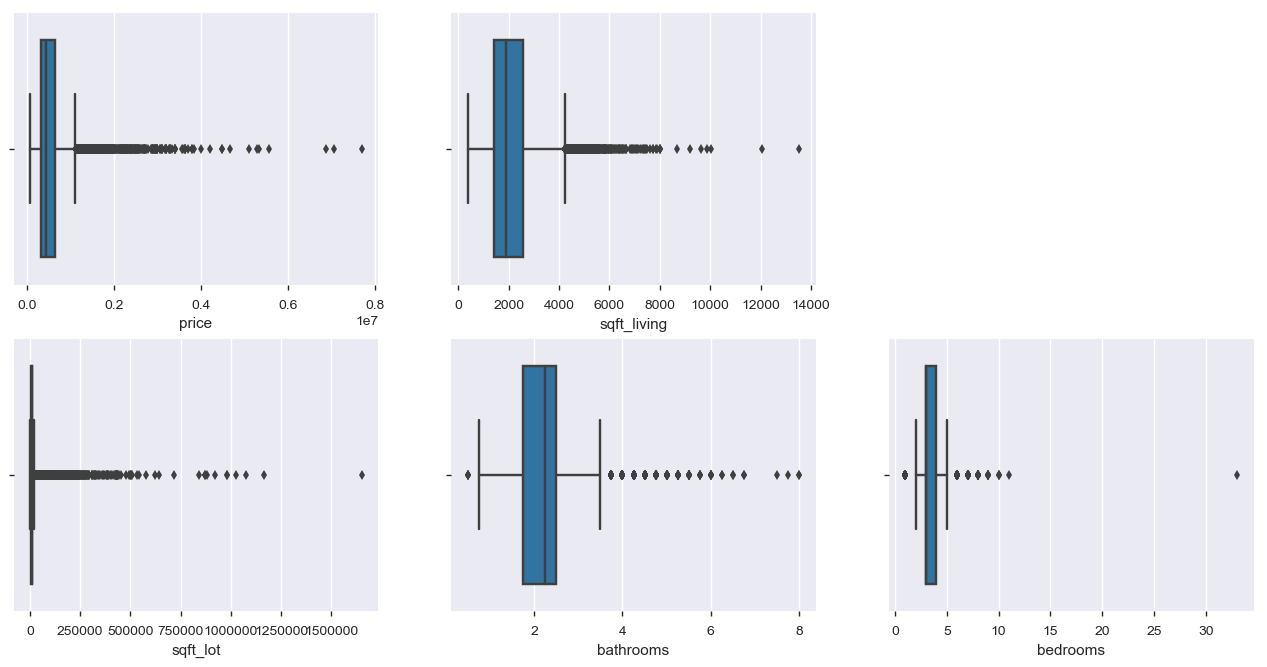

In [15]:
plt.figure(figsize=(16,12))
plt.subplot(331)
sns.boxplot(df.price)
plt.subplot(332)
sns.boxplot(df.sqft_living)
plt.subplot(334)
sns.boxplot(df.sqft_lot)
plt.subplot(335)
sns.boxplot(df.bathrooms)
plt.subplot(336)
sns.boxplot(df.bedrooms)

Based on the above, we can clearly see some outliers. Let's drop those observations from our dataset now.

In [16]:
# Removing outliers from dataset
print('Original dataset:',len(df))
df = df[df.price < 5000000]
df = df[df.sqft_living < 8000]
df = df[df.sqft_lot < 600000]
df = df[df.bathrooms < 6]
df = df[df.bedrooms < 9]
print('After removing outliers:',len(df))

Original dataset: 21597
After removing outliers: 21553


##  Null Values

In [17]:
#Confirming missing values
df.isna().sum()

id                  0
date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2373
view               62
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3833
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64

**Note:** There are missing values in `waterfront`, `view`, and `yr_renovated`.

### `waterfront`

In [18]:
#Looking more closely at Waterfront, the percentage of null values in this column:
df.waterfront.isna().sum()/df.shape[0]

0.11010068203962325

**Note:** 11% of our Waterfront of data is null.  Knowing this, what else can we infer about the distribution and information in this column?  Let's look at the distribution of values:

In [19]:
df.waterfront.unique()

array([nan,  0.,  1.])

In [20]:
df.waterfront.value_counts()

0.0    19038
1.0      142
Name: waterfront, dtype: int64

There are only 146 houses in our dataset that are on the waterfront.

In [21]:
print("Percentage of houses that are NOT waterfront:", 
      (len(df.loc[df.waterfront == 0.0]))/df.shape[0])

Percentage of houses that are NOT waterfront: 0.8833109079942467


In [22]:
#Separate the data for waterfront and explore, (removing the NaN)
df2_waterfront = df[df.waterfront==df.waterfront]
df2_waterfront.shape

(19180, 21)

In [23]:
print(df2_waterfront[df2_waterfront.waterfront==0].shape, df2_waterfront[df2_waterfront.waterfront==1].shape)

(19038, 21) (142, 21)


In [24]:
df2_waterfront[df2_waterfront.waterfront==0].describe()

id         price      bedrooms     bathrooms   sqft_living  \
count  1.903800e+04  1.903800e+04  19038.000000  19038.000000  19038.000000   
mean   4.594834e+09  5.300363e+05      3.368579      2.108008   2067.420055   
std    2.876397e+09  3.303117e+05      0.888921      0.753077    889.974483   
min    1.000102e+06  7.800000e+04      1.000000      0.500000    370.000000   
25%    2.125049e+09  3.200000e+05      3.000000      1.750000   1420.000000   
50%    3.905090e+09  4.500000e+05      3.000000      2.250000   1910.000000   
75%    7.334475e+09  6.368075e+05      4.000000      2.500000   2540.000000   
max    9.900000e+09  4.490000e+06      8.000000      5.750000   7880.000000   

            sqft_lot        floors  waterfront          view     condition  \
count   19038.000000  19038.000000     19038.0  18982.000000  19038.000000   
mean    14368.002941      1.493224         0.0      0.202508      3.409339   
std     32748.716278      0.539851         0.0      0.695048      0.649591   
min       520.000000      1.000000         0.0      0.000000      1.000000   
25%      5031.250000      1.000000         0.0      0.000000      3.000000   
50%      7582.500000      1.500000         0.0      0.000000      3.000000   
75%     10562.250000      2.000000         0.0      0.000000      4.000000   
max    577605.000000      3.500000         0.0      4.000000      5.000000   

              grade    sqft_above  sqft_basement      yr_built  yr_renovated  \
count  19038.000000  19038.000000   19038.000000  19038.000000  15659.000000   
mean       7.648230   1781.153640     280.050741   1971.104843     79.044000   
std        1.158845    812.878748     430.687001     29.374381    389.323365   
min        3.000000    370.000000       0.000000   1900.000000      0.000000   
25%        7.000000   1190.000000       0.000000   1952.000000      0.000000   
50%        7.000000   1560.000000       0.000000   1975.000000      0.000000   
75%        8.000000   2200.000000     530.000000   1997.000000      0.000000   
max       13.000000   7880.000000    3260.000000   2015.000000   2015.000000   

            zipcode           lat          long  sqft_living15     sqft_lot15  
count  19038.000000  19038.000000  19038.000000   19038.000000   19038.000000  
mean   98077.629163     47.560063   -122.213672    1980.714991   12518.225812  
std       53.376624      0.138877      0.140564     679.201933   25532.643780  
min    98001.000000     47.155900   -122.519000     399.000000     651.000000  
25%    98032.000000     47.471200   -122.328000    1490.000000    5100.000000  
50%    98065.000000     47.572150   -122.230000    1840.000000    7600.000000  
75%    98117.000000     47.678300   -122.125000    2350.000000   10018.750000  
max    98199.000000     47.777600   -121.315000    6210.000000  560617.000000

In [25]:
df2_waterfront[df2_waterfront.waterfront==1].describe()

id         price    bedrooms   bathrooms  sqft_living  \
count  1.420000e+02  1.420000e+02  142.000000  142.000000   142.000000   
mean   4.435820e+09  1.609671e+06    3.295775    2.626761  3089.112676   
std    2.830157e+09  9.489542e+05    1.063840    1.012662  1371.905865   
min    1.210290e+08  2.850000e+05    1.000000    0.750000   440.000000   
25%    2.024319e+09  8.212500e+05    3.000000    1.750000  2072.500000   
50%    3.692780e+09  1.405000e+06    3.000000    2.500000  2855.000000   
75%    7.352200e+09  2.200000e+06    4.000000    3.250000  3912.500000   
max    9.536600e+09  4.500000e+06    6.000000    5.500000  7000.000000   

            sqft_lot      floors  waterfront        view   condition  \
count     142.000000  142.000000       142.0  142.000000  142.000000   
mean    25749.366197    1.626761         1.0    3.795775    3.549296   
std     45204.039187    0.550424         0.0    0.539750    0.749255   
min      1989.000000    1.000000         1.0    1.000000    1.000000   
25%     11533.000000    1.000000         1.0    4.000000    3.000000   
50%     17488.500000    2.000000         1.0    4.000000    3.000000   
75%     26447.500000    2.000000         1.0    4.000000    4.000000   
max    505166.000000    3.000000         1.0    4.000000    5.000000   

            grade   sqft_above  sqft_basement     yr_built  yr_renovated  \
count  142.000000   142.000000     142.000000   142.000000    117.000000   
mean     8.753521  2414.007042     667.359155  1961.830986    458.649573   
std      1.734860  1152.448202     706.134632    27.094259    840.994827   
min      5.000000   440.000000       0.000000  1905.000000      0.000000   
25%      8.000000  1560.000000       0.000000  1941.250000      0.000000   
50%      9.000000  2162.500000     480.000000  1959.000000      0.000000   
75%     10.000000  3022.500000    1197.500000  1984.000000      0.000000   
max     12.000000  6350.000000    3500.000000  2014.000000   2006.000000   

            zipcode         lat        long  sqft_living15     sqft_lot15  
count    142.000000  142.000000  142.000000     142.000000     142.000000  
mean   98098.612676   47.537648 -122.280049    2653.119718   22923.732394  
std       60.311702    0.114346    0.124993     796.701297   23564.762140  
min    98006.000000   47.327600 -122.514000     750.000000    3230.000000  
25%    98043.000000   47.450700 -122.376750    2045.000000   11991.500000  
50%    98075.000000   47.543050 -122.276500    2665.000000   15960.000000  
75%    98155.000000   47.605225 -122.209250    3127.500000   24235.750000  
max    98199.000000   47.772900 -122.059000    4913.000000  192268.000000

In comparing the descriptive statistics for waterfront versus non-waterfront houses, we can see some difference between the two subsets, in terms of mean `price` and std of `price`. Let's try another approach to figuring out how to deal with the null values in `waterfront`.

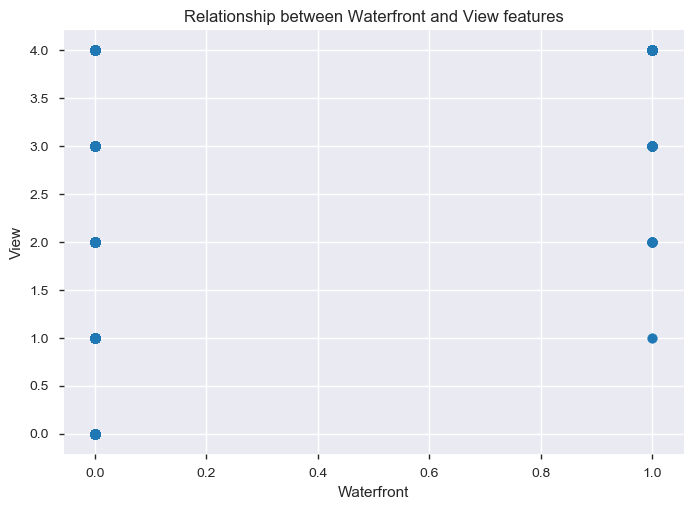

In [26]:
#Waterfront properties and View: 
plt.scatter(df.waterfront, df.view)
plt.title('Relationship between Waterfront and View features')
plt.xlabel('Waterfront')
plt.ylabel('View')
plt.show()

From the above we can see that all waterfront houses have been viewed, and that houses without any views are also non-waterfront houses. Based on this and on the fact that most houses are NOT on the waterfront anyways, we will replace `waterfront` null values with 0 when `view` is also 0. 

    (credit: https://github.com/arseniyturin/dsc-1-final-project-online-ds-sp-000/blob/master/student.ipynb)

In [27]:
#based on the above assumption let's see how many records would be covered:
print('Percentage of null values we can replace based on the above observation:',
      round( len(df[ (df.waterfront.isna()) & (df.view==0) ])/sum(df.waterfront.isna())*100, 2), '%' )

Percentage of null values we can replace based on the above observation: 88.83 %


In [28]:
# We'll replace all the Waterfront null values with 0
df.loc[df.waterfront.isna(), 'waterfront'] = 0
df.waterfront = df.waterfront.astype('int')

### `view`
Based on the assumption that the null values are really houses that have not been viewed - because houses that have been viewed are more likely to be recorded as having been viewed - we will replace the `view` NaN's with 0. But first we'll take a quick look at the distribution of `view`, to confirm our suspicion that most values are 0.

In [29]:
df.view.value_counts()

0.0    19394
2.0      953
3.0      504
1.0      330
4.0      310
Name: view, dtype: int64

/anaconda3/envs/learn-env/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


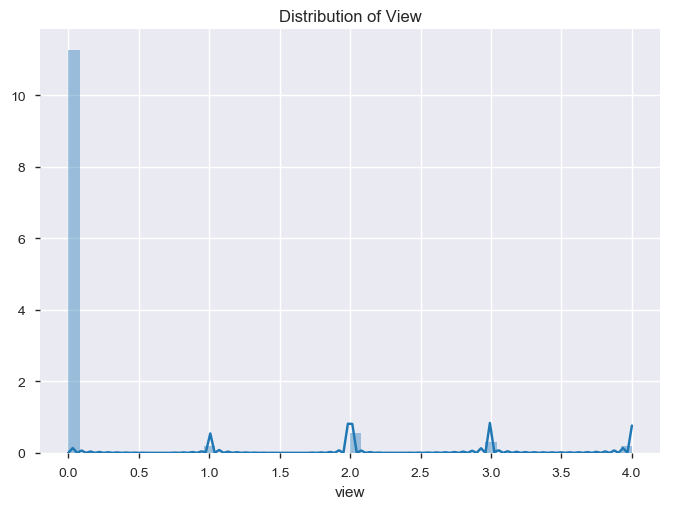

In [30]:
# or to visualize the distribution...
sns.distplot(df[df.view.notna()]['view'])
plt.title('Distribution of View')
plt.show()

In [31]:
#replacing null values with 0.
df['view'] = df['view'].fillna(0)

In [32]:
df.view.value_counts()

0.0    19456
2.0      953
3.0      504
1.0      330
4.0      310
Name: view, dtype: int64

### `yr_renovated`


Similar to the previous two variables - `view` and `waterfront` - we should look at the distribution of values in `yr_renovated` to decide how best to deal with the null values.

/anaconda3/envs/learn-env/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


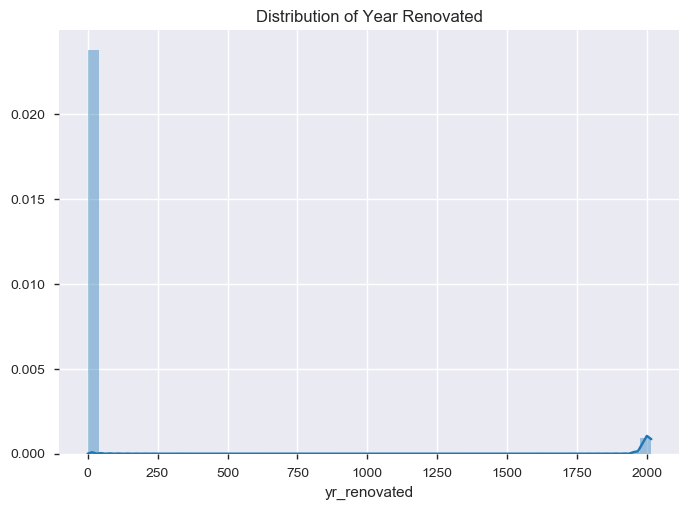

In [33]:
#visualizing the distribution of yr_renovated without null values.
sns.distplot(df[df.yr_renovated.notna()] ['yr_renovated'])
plt.title('Distribution of Year Renovated')
plt.show()

It would be difficult to find a relationship between `yr_renovated` and other variables, and given the fact that the majority of `yr_renovated` values are 0, we will replace the null values with 0.

In [34]:
df['yr_renovated'] = df['yr_renovated'].fillna(0)

In [35]:
#to confirm that all null values have been dealt with:
df.isna().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21553 entries, 0 to 21596
Data columns (total 21 columns):
id               21553 non-null int64
date             21553 non-null datetime64[ns]
price            21553 non-null float64
bedrooms         21553 non-null int64
bathrooms        21553 non-null float64
sqft_living      21553 non-null int64
sqft_lot         21553 non-null int64
floors           21553 non-null float64
waterfront       21553 non-null int64
view             21553 non-null float64
condition        21553 non-null int64
grade            21553 non-null int64
sqft_above       21553 non-null int64
sqft_basement    21553 non-null float64
yr_built         21553 non-null int64
yr_renovated     21553 non-null float64
zipcode          21553 non-null int64
lat              21553 non-null float64
long             21553 non-null float64
sqft_living15    21553 non-null int64
sqft_lot15       21553 non-null int64
dtypes: datetime64[ns](1), float64(8), int64(12)
memory usage: 3.6 M

# **Explore**

Now that we have taken some initial steps into familiarizing and cleaning our data, we will explore each variable more closely with the goal of deciding 1) that the OLS assumptions are in place, 2) that we identify and deal with any multicollinearity and covariance amongst our predictors, and 3) that our data is transformed into the correct data types and with normal distributions.  This way we will work towards producing a final clean dataset for modeling.

**Steps To Take:**
- Continue to get to know the dataset
    - [X] look for multicollinearity
- Deal with Categorical variables
    - [X] determine if binning is required
    - [X] Create dummy variables/one-hot-encoding
- Create visualizations to understand that the OLS assumptions are in place:
    - *Linearity* - there should be a linear relationship between the the dependent var (price) and the independent variables
        - [X] scatterplots
        - [X] deal with any remaining outliers 
    - *Normality* - this may require normalization techniques for some variables (log transform, min-max scaling, standardization, mean normalization, unit vector transformation)
        - [ ] Jarque-Bera test can be used to test for normality - especially when the number of data points is large
    - *Heteroscedasticity* if the variability of a variable is unequal across the range of values of a second variable that predicts it.
        - [ ] Q-Q-Plots for normality in residuals
        - [ ] scatterplots to check of cone shape or not
        - [ ] Breusch-Pagan/Cook-Weisberg test or White general test
- Produce a final, clean dataset ready for modeling!

In [37]:
#before we make any transformation to the data, we'll create a copy of the original data
df_original = df.copy()

In [38]:
import warnings
warnings.filterwarnings("ignore")

## Initial EDA: Multicollinearity, Dropping Columns, Categorical Data

Now that we've dealt with null values and some outliers, let's take another quick profile look at our remaining variables.

In [39]:
pandas_profiling.ProfileReport(df)

We can see that all null values are gone, but we should look at `sqft_basement`, `view`, and `waterfront` to decide how to deal with the high number of zeros in the data. Perhaps converting them into boolean data would make the most sense. Let's quickly take a look at the consolidated histograms for our variables.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1c15d49e48>,
      dtype=object)

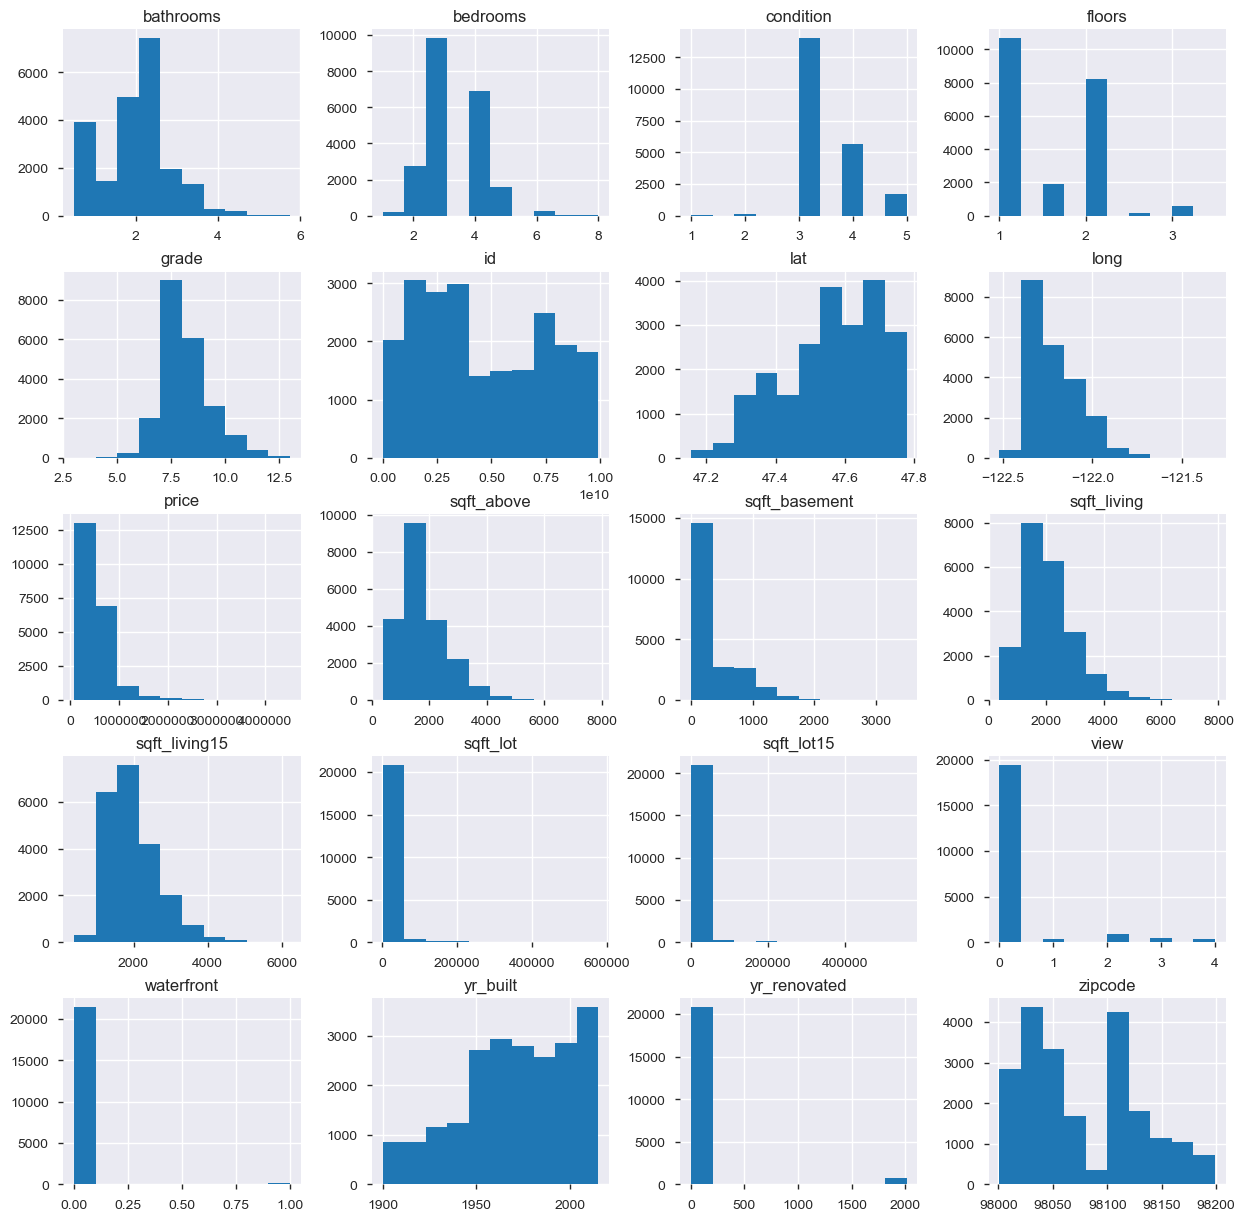

In [40]:
#for a consolidated look at the distributions of our data
df.hist(figsize = (15,15))

The above histograms show that none of the variables are normally distributed, with the possible exception of `grade`. There appear to be some outliers that need to be dealt with, as well as categorical data that should eventually be one-hot-encoded. We will now examine each variable individually and perform and necessary normalizations or transformations needed. We will begin by dropping a few columns, then data transformations and feature engineering, and testing of assumptions around linearity, normality, and heteroskedasticity.

In [41]:
df.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

### Dropping columns

In [42]:
df = df.drop("date", axis=1)

In [43]:
df = df.drop("id", axis=1)

In [44]:
df.head()

price  bedrooms  bathrooms  sqft_living  sqft_lot  floors  waterfront  \
0  221900.0         3       1.00         1180      5650     1.0           0   
1  538000.0         3       2.25         2570      7242     2.0           0   
2  180000.0         2       1.00          770     10000     1.0           0   
3  604000.0         4       3.00         1960      5000     1.0           0   
4  510000.0         3       2.00         1680      8080     1.0           0   

   view  condition  grade  sqft_above  sqft_basement  yr_built  yr_renovated  \
0   0.0          3      7        1180            0.0      1955           0.0   
1   0.0          3      7        2170          400.0      1951        1991.0   
2   0.0          3      6         770            0.0      1933           0.0   
3   0.0          5      7        1050          910.0      1965           0.0   
4   0.0          3      8        1680            0.0      1987           0.0   

   zipcode      lat     long  sqft_living15  sqft_lot15  
0    98178  47.5112 -122.257           1340        5650  
1    98125  47.7210 -122.319           1690        7639  
2    98028  47.7379 -122.233           2720        8062  
3    98136  47.5208 -122.393           1360        5000  
4    98074  47.6168 -122.045           1800        7503

In order to understand if we can drop any other columns, we'll do a quick look at correlation between variables

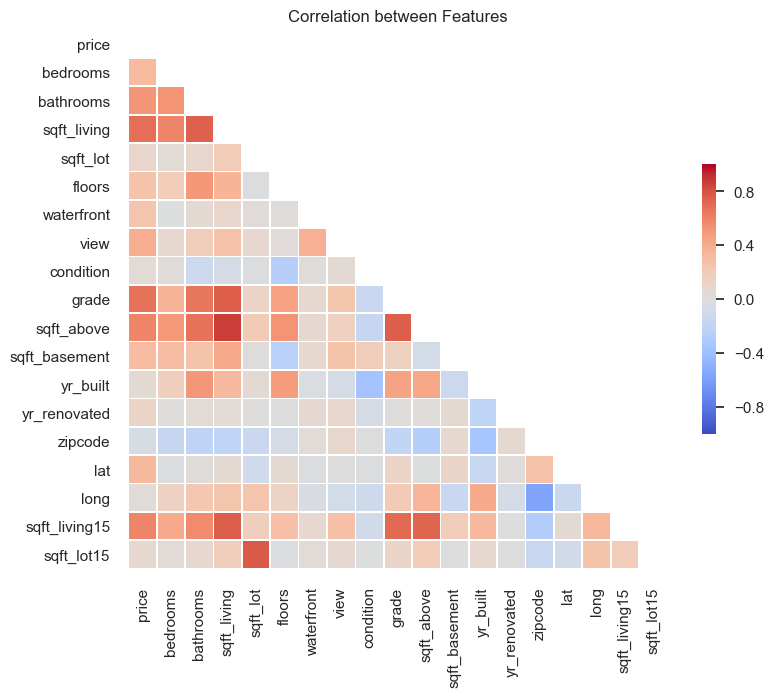

In [45]:
sns.set(style="white")

# Compute correlation matrix
corr = df.corr()

# Generate a mask for upper triangle
mask = np.zeros_like(corr,dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# set up the matplot figure
f, ax = plt.subplots(figsize=(9,7))

# set up custom diverging map
#cmap = sns.diverging_palette(220,10,as_cmap=True)

# make the heatmap with the correct aspect ratio
sns.heatmap(corr, mask=mask, cmap='coolwarm', vmax=1, vmin=-1,
           center=0, square=True, linewidths=.5, cbar_kws={"shrink": .5})
plt.title('Correlation between Features')
plt.show()

The above shows high correlation between: 
- `sqft_living` and `sqft_above`
- `sqft_living` and `sqft_living15`
- `grade` and several features (`sqft_living` and `bedrooms`) - *need to explore further*
- `sqft_living` and `bathrooms` - *while this makes sense, we don't want to introduce issues into our final modeling based on this high covariance between these two variables*
- `sqft_lot` and `sqft_lot15`

In [46]:
# based on above we can see that sqft_above and sqft_living are highly correlated so let's drop one of them
df = df.drop('sqft_above', axis=1)

In [47]:
# based on the high correlations between sqft_lot and sqft_lot15 
# and separately between sqft_living and swft_living15, we're going to drop sqft_lot15 and sqft_living15
df = df.drop(['sqft_lot15', 'sqft_living15'], axis=1)

### Dealing with Location Data

Since it is common knowledge that location can have a major impact on housing value, let's explore how we can effectively use the location info. 

Starting with Lat and Long, let's plot these against price using a diverging colorbar to understand differences in housing prices.

(credit: https://github.com/arcaputo3/dsc-1-final-project-online-ds-sp-000/blob/master/student.ipynb)

Text(0.5, 1.0, 'Price According to Geo-Coordinates')

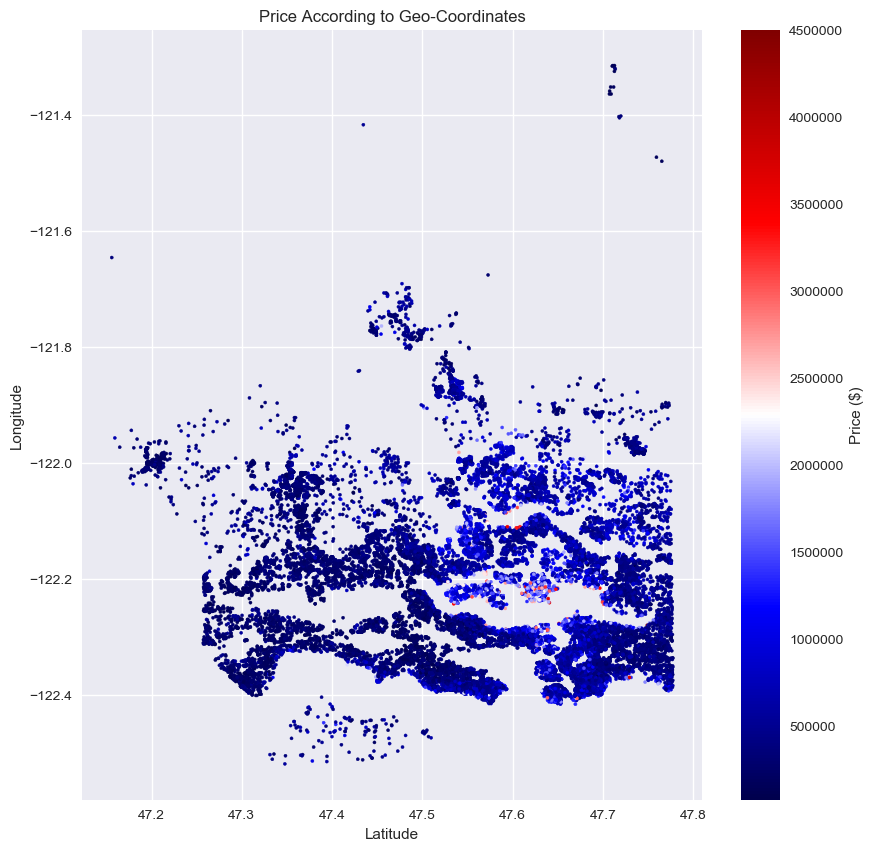

In [48]:
plt.style.use('seaborn')
plt.figure(figsize=(10, 10))
plt.scatter(df.lat, df.long, c=df.price, s=5, cmap='seismic')
c = plt.colorbar()
c.set_label('Price ($)')
plt.xlabel('Latitude')
plt.ylabel('Longitude')
plt.title('Price According to Geo-Coordinates')

Text(0.5, 1.0, 'Price According to Zipcode')

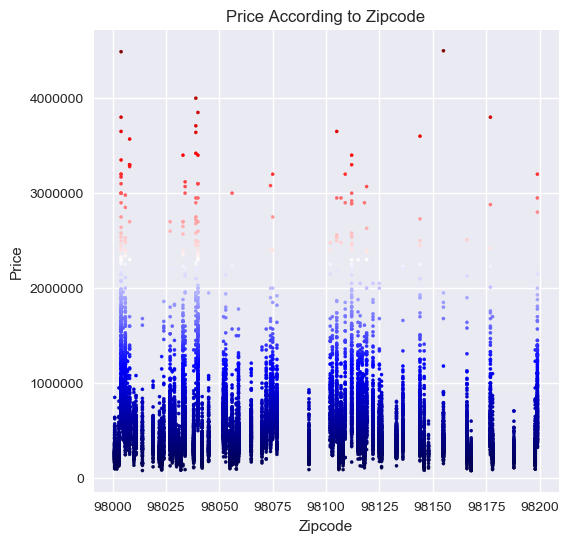

In [49]:
plt.style.use('seaborn')
plt.figure(figsize=(6,6))
plt.scatter(df.zipcode, df.price, c=df.price, s=5, cmap='seismic')
c = plt.colorbar
plt.xlabel('Zipcode')
plt.ylabel('Price')
plt.title('Price According to Zipcode')

Both Zipcode and Lat/Long show a relationship with price, with the latter perhaps offering more granular level insights on price. We will drop zipcode and use lat/long through a spectral clustering tool, which will enable us to bin our location data and use for modeling. 

(credit: https://github.com/arcaputo3/dsc-1-final-project-online-ds-sp-000/blob/master/student.ipynb)

In [50]:
X_loc = df[['lat', 'long']]

# import spectral clustering tool, making 10 bins/clusters which we'll one-hot-encode
from sklearn.cluster import SpectralClustering
model = SpectralClustering(n_clusters=10, affinity='nearest_neighbors',
                           assign_labels='kmeans')
labels = model.fit_predict(X_loc)

Text(0.5, 1.0, 'Spectral Clustering of Geo-Coordinates (10 Clusters)')

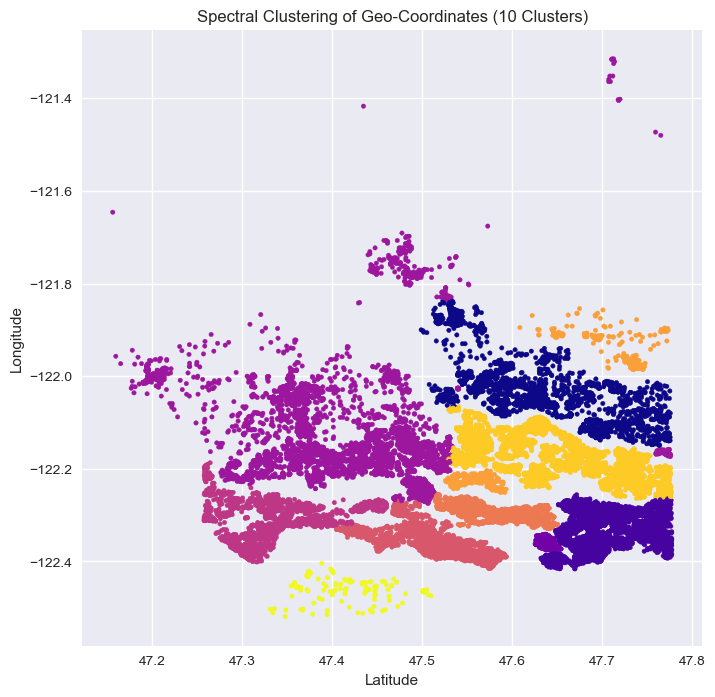

In [51]:
plt.figure(figsize=(8, 8))
plt.scatter(X_loc.iloc[:, 0], X_loc.iloc[:, 1], c=labels, s=10, cmap='plasma')
plt.xlabel('Latitude')
plt.ylabel('Longitude')
plt.title('Spectral Clustering of Geo-Coordinates (10 Clusters)')

We will now use the labels to create new columns to represent location info based on our 10 clusters.

In [52]:
labels[:10]

array([3, 1, 8, 5, 0, 0, 4, 4, 5, 3], dtype=int32)

In [53]:
#make a new column for location data
df['location'] = labels
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21553 entries, 0 to 21596
Data columns (total 17 columns):
price            21553 non-null float64
bedrooms         21553 non-null int64
bathrooms        21553 non-null float64
sqft_living      21553 non-null int64
sqft_lot         21553 non-null int64
floors           21553 non-null float64
waterfront       21553 non-null int64
view             21553 non-null float64
condition        21553 non-null int64
grade            21553 non-null int64
sqft_basement    21553 non-null float64
yr_built         21553 non-null int64
yr_renovated     21553 non-null float64
zipcode          21553 non-null int64
lat              21553 non-null float64
long             21553 non-null float64
location         21553 non-null int32
dtypes: float64(8), int32(1), int64(8)
memory usage: 2.9 MB


Now that `location` is added, we will one-hot-encode this column to represent each of the 10 clusters, and then drop `zipcode`, `lat`, and `long`.

In [54]:
df.location = df.location.astype('category')
df = pd.get_dummies(df, drop_first=True)

In [55]:
# check that they've been added
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21553 entries, 0 to 21596
Data columns (total 25 columns):
price            21553 non-null float64
bedrooms         21553 non-null int64
bathrooms        21553 non-null float64
sqft_living      21553 non-null int64
sqft_lot         21553 non-null int64
floors           21553 non-null float64
waterfront       21553 non-null int64
view             21553 non-null float64
condition        21553 non-null int64
grade            21553 non-null int64
sqft_basement    21553 non-null float64
yr_built         21553 non-null int64
yr_renovated     21553 non-null float64
zipcode          21553 non-null int64
lat              21553 non-null float64
long             21553 non-null float64
location_1       21553 non-null uint8
location_2       21553 non-null uint8
location_3       21553 non-null uint8
location_4       21553 non-null uint8
location_5       21553 non-null uint8
location_6       21553 non-null uint8
location_7       21553 non-null uint8
l

In [56]:
#remove the other location variables
df = df.drop(['zipcode', 'lat', 'long'], axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21553 entries, 0 to 21596
Data columns (total 22 columns):
price            21553 non-null float64
bedrooms         21553 non-null int64
bathrooms        21553 non-null float64
sqft_living      21553 non-null int64
sqft_lot         21553 non-null int64
floors           21553 non-null float64
waterfront       21553 non-null int64
view             21553 non-null float64
condition        21553 non-null int64
grade            21553 non-null int64
sqft_basement    21553 non-null float64
yr_built         21553 non-null int64
yr_renovated     21553 non-null float64
location_1       21553 non-null uint8
location_2       21553 non-null uint8
location_3       21553 non-null uint8
location_4       21553 non-null uint8
location_5       21553 non-null uint8
location_6       21553 non-null uint8
location_7       21553 non-null uint8
location_8       21553 non-null uint8
location_9       21553 non-null uint8
dtypes: float64(6), int64(7), uint8(9)
memo

### Dealing with yr_renovated

Given the fact that `yr_renovated` has so many 0's, this data would be better represented as binary information as to whether the house has been renovated or not.

In [57]:
#Checking number of 0 values in `yr_renovated`
print(df[df.yr_renovated == 0.0].shape[0])

20814


#### **Question 1:** 
Considering that most houses have either not been renovated or do not data on when they've been renovated, can we look at the houses that have been renovated and see anything significant in their distribution and relationship with price?

In [58]:
df_ren = df[df.yr_renovated > 0.0]
df_ren.shape

(739, 22)

We can see that there are only 739 houses in our dataset that have been confirmed as renovated.  Let's take a quick look at their distribution.

Text(0.5, 0, 'year renovated')

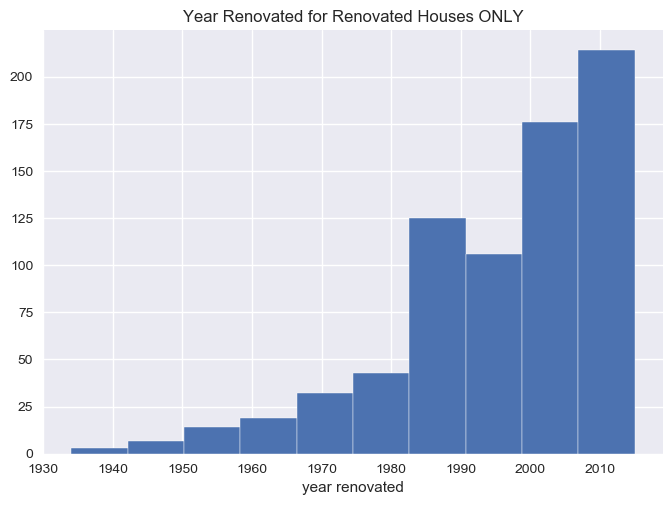

In [59]:
plt.hist(df_ren['yr_renovated'])
plt.title('Year Renovated for Renovated Houses ONLY')
plt.xlabel('year renovated')

We can see that the distribution of the year of renovation for renovated houses is not at all normal; it's left skewed. The above is not entirely surprising, but we should question some of the validity of the data in the sense that the apparent increase in renovations in more recent decades could be a reflection of self-reporting biases in renovation work.  For instance, if we were to do some research on changes in tax benefits and regulations over the years, perhaps we would see an increase in both the number of renovations and, as importantly, the data collected/reported on renovations.  Home-owners may have been incentivized to report renovation work in recent years if it increased the valuations of their homes or provided some kind of tax benefit.  Meaning, perhaps before such a policy change,  homeowners weren't as likely to report renovation work, and consequently we aren't seeing accurate data on renovation work over the years.  

Separately, we should explore further to understand if renovation work correlates with the age of a house, as this interaction could produce mixed results in terms of the relationship with `price`.  For instance, if we see that renovation work is isolated to older houses, then it's possible that the age of the house acts as it's own drag on the price of the house.  Without being able to do more advanced time-series analysis on these variables, let's take a quick look now at a correlation matrix of `yr_built`, `price`, and `yr_renovated` to see if our assumptions are resonate.

In [60]:
df[['price', 'yr_renovated', 'yr_built']].corr()

price  yr_renovated  yr_built
price         1.000000      0.112983  0.053829
yr_renovated  0.112983      1.000000 -0.201869
yr_built      0.053829     -0.201869  1.000000

Above, it's clear that the correlations with `price` are quite weak, with `yr_renovated` having a slightly stronger correlation of 11% compared to 5% for `yr_built` and `price`.  We will deal with `yr_built` later, but for the moment we can see that `yr_built` and `yr_renovated` have an inverse correlation of 20%, possibly indicating that the older a house is the more likely that it's been renovated (or the newer a house is the less likely that it's been renovated - which makes sense!).  

Let's get back to looking at the relationship between renovated houses over the years and price.

Text(0.5, 27.722222222222214, 'Year Renovated')

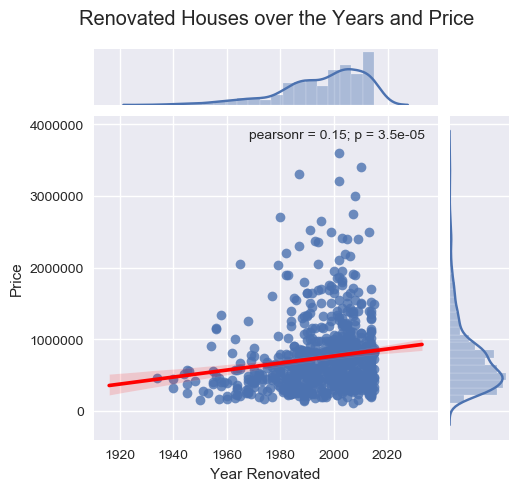

In [61]:
sns.jointplot(x=df_ren.yr_renovated, y=df_ren.price, data = df_ren, stat_func=pearsonr, 
              kind='reg', height=5, joint_kws={'line_kws':{'color': 'red'}})
plt.subplots_adjust(top=0.90)
plt.suptitle('Renovated Houses over the Years and Price') 
plt.ylabel('Price')
plt.xlabel('Year Renovated')

The above shows a very weak uphill correlation between `yr_renovated` for renovated houses and `price`. So far it seems like `yr_renovated` does not satisfy the normality or linearity assumptions for our OLS regression.  Let's consider turning this variable into boolean data and see if this has any predictive power on `price`.

In [62]:
# Make a new column for renovated binary variable, and then drop yr_renovated
df['renovated'] = (df.yr_renovated > 0).astype('uint8')
df = df.drop('yr_renovated', axis =1)

In [63]:
# let's check that the number of 0's is the same as before we changed 
# it to a binary variable and then removed yr_renovated
df.renovated.value_counts()

0    20814
1      739
Name: renovated, dtype: int64

In [64]:
df[['price', 'renovated']].corr()

price  renovated
price      1.000000   0.112662
renovated  0.112662   1.000000

Turning `yr-renovated` into a binary categorical variable does not increase the correlation with `price`, and it remains quite weak at 11%.  We will remove `renovated` from our dataset.

In [65]:
df = df.drop('renovated', axis=1)

### Dealing with `sqft_basement`

Similarly to the issue with `yr_renovated`, we can recall that `sqft_basement` has a high amount of 0's. We may consider changing this column to a binary variable to indicate whether a house has a basement or not, but first let's get a sense of the distribution.

Text(0.5, 1.0, 'Sqft Basement Distribution')

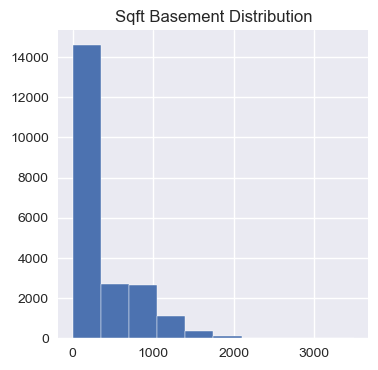

In [66]:
df.sqft_basement.hist(figsize=(4,4))
plt.title('Sqft Basement Distribution')

In [67]:
# Checking number of 0 values in `sqft_basement`
print(df[df.sqft_basement == 0.0].shape[0])

13264


In [68]:
print("Percentage of houses WITHOUT a basement:",
     (round(len(df[df.sqft_basement == 0.0])/df.shape[0],2)))

Percentage of houses WITHOUT a basement: 0.62


Considering that 62% of our houses do not have basements, we should explore the best way to utilize basement data for our model.

Text(0.5, 0.98, 'sqft_basements vs. Price')

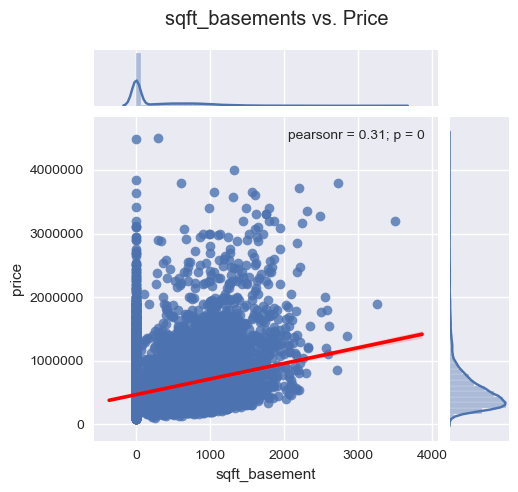

In [69]:
# jointplot of sqft_basement and price
sns.jointplot(x=df.sqft_basement, y=df.price, data = df, stat_func=pearsonr, 
              kind='reg', height=5, joint_kws={'line_kws':{'color': 'red'}})
plt.subplots_adjust(top=0.90)
plt.suptitle('sqft_basements vs. Price') 

Above we can see a statistically significant uphill correlation between `sqft_basement` and `price`, but the histogram for `sqft_basement` is highly skewed with a long right-tail.

#### **Question 2:** 
Does basement data have more predictive power as a binary variable (has basement or not) or as numerical data (square footage of basement)?

Let's if there are any major differences in the relationship with price by splitting the data - houses without basements versus houses with basements of varying sizes.

In [70]:
#houses WITH a basement
df_base = df[df.sqft_basement > 0.0]
print(df_base.shape)
df_base.describe()

(8289, 21)


price     bedrooms    bathrooms  sqft_living       sqft_lot  \
count  8.289000e+03  8289.000000  8289.000000  8289.000000    8289.000000   
mean   6.162658e+05     3.544577     2.261672  2299.619616   12939.168778   
std    4.072450e+05     0.932817     0.754686   907.094141   28980.427653   
min    1.000000e+05     1.000000     0.500000   680.000000     572.000000   
25%    3.750000e+05     3.000000     1.750000  1680.000000    5000.000000   
50%    5.145000e+05     3.000000     2.250000  2100.000000    7552.000000   
75%    7.100000e+05     4.000000     2.750000  2700.000000   10625.000000   
max    4.500000e+06     8.000000     5.750000  7730.000000  542322.000000   

            floors   waterfront         view    condition        grade  \
count  8289.000000  8289.000000  8289.000000  8289.000000  8289.000000   
mean      1.319761     0.010375     0.400651     3.517915     7.724333   
std       0.475031     0.101335     0.972501     0.697450     1.095308   
min       1.000000     0.000000     0.000000     1.000000     4.000000   
25%       1.000000     0.000000     0.000000     3.000000     7.000000   
50%       1.000000     0.000000     0.000000     3.000000     7.000000   
75%       2.000000     0.000000     0.000000     4.000000     8.000000   
max       3.500000     1.000000     4.000000     5.000000    13.000000   

          ...          yr_built   location_1   location_2   location_3  \
count     ...       8289.000000  8289.000000  8289.000000  8289.000000   
mean      ...       1964.907830     0.257570     0.022198     0.133068   
std       ...         28.308145     0.437322     0.147336     0.339669   
min       ...       1900.000000     0.000000     0.000000     0.000000   
25%       ...       1947.000000     0.000000     0.000000     0.000000   
50%       ...       1966.000000     0.000000     0.000000     0.000000   
75%       ...       1983.000000     1.000000     0.000000     0.000000   
max       ...       2015.000000     1.000000     1.000000     1.000000   

        location_4   location_5   location_6   location_7   location_8  \
count  8289.000000  8289.000000  8289.000000  8289.000000  8289.000000   
mean      0.067559     0.129449     0.116178     0.023887     0.177585   
std       0.251003     0.335716     0.320458     0.152707     0.382186   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%       0.000000     0.000000     0.000000     0.000000     0.000000   
50%       0.000000     0.000000     0.000000     0.000000     0.000000   
75%       0.000000     0.000000     0.000000     0.000000     0.000000   
max       1.000000     1.000000     1.000000     1.000000     1.000000   

        location_9  
count  8289.000000  
mean      0.003619  
std       0.060055  
min       0.000000  
25%       0.000000  
50%       0.000000  
75%       0.000000  
max       1.000000  

[8 rows x 21 columns]

In [71]:
# Houses WITHOUT a basement
df_no_base = df[df.sqft_basement==0.0]
print(df_no_base.shape)
df_no_base.describe()

(13264, 21)


price      bedrooms     bathrooms   sqft_living       sqft_lot  \
count  1.326400e+04  13264.000000  13264.000000  13264.000000   13264.000000   
mean   4.874647e+05      3.256182      2.016624   1931.993290   15405.912017   
std    2.955625e+05      0.847022      0.742785    859.826358   35668.294504   
min    7.800000e+04      1.000000      0.500000    370.000000     520.000000   
25%    2.999375e+05      3.000000      1.500000   1280.000000    5131.750000   
50%    4.140250e+05      3.000000      2.000000   1750.000000    7644.000000   
75%    5.950000e+05      4.000000      2.500000   2440.000000   10656.250000   
max    4.490000e+06      8.000000      5.750000   7880.000000  577605.000000   

             floors    waterfront          view     condition         grade  \
count  13264.000000  13264.000000  13264.000000  13264.000000  13264.000000   
mean       1.601704      0.004222      0.125679      3.342808      7.609168   
std        0.548988      0.064842      0.566706      0.610067      1.205429   
min        1.000000      0.000000      0.000000      1.000000      3.000000   
25%        1.000000      0.000000      0.000000      3.000000      7.000000   
50%        2.000000      0.000000      0.000000      3.000000      7.000000   
75%        2.000000      0.000000      0.000000      4.000000      8.000000   
max        3.500000      1.000000      4.000000      5.000000     13.000000   

           ...           yr_built    location_1    location_2    location_3  \
count      ...       13264.000000  13264.000000  13264.000000  13264.000000   
mean       ...        1974.799231      0.153951      0.008142      0.276086   
std        ...          29.365142      0.360915      0.089870      0.447077   
min        ...        1900.000000      0.000000      0.000000      0.000000   
25%        ...        1954.000000      0.000000      0.000000      0.000000   
50%        ...        1981.000000      0.000000      0.000000      0.000000   
75%        ...        2000.000000      0.000000      0.000000      1.000000   
max        ...        2015.000000      1.000000      1.000000      1.000000   

         location_4    location_5    location_6    location_7    location_8  \
count  13264.000000  13264.000000  13264.000000  13264.000000  13264.000000   
mean       0.083610      0.087153      0.052774      0.026764      0.140606   
std        0.276812      0.282070      0.223591      0.161400      0.347628   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        0.000000      0.000000      0.000000      0.000000      0.000000   
50%        0.000000      0.000000      0.000000      0.000000      0.000000   
75%        0.000000      0.000000      0.000000      0.000000      0.000000   
max        1.000000      1.000000      1.000000      1.000000      1.000000   

         location_9  
count  13264.000000  
mean       0.006408  
std        0.079798  
min        0.000000  
25%        0.000000  
50%        0.000000  
75%        0.000000  
max        1.000000  

[8 rows x 21 columns]

While the mean price is higher for houses with basements, so is the standard deviation, suggesting a higher variance in price for houses with basements compared to houses without.

Text(0.5, 0.98, 'Houses WITH basements vs. Price')

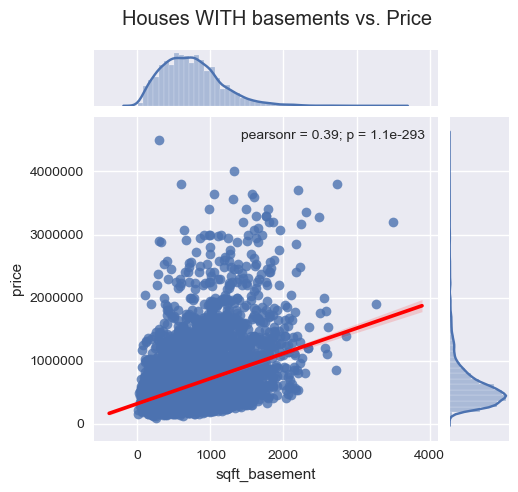

In [72]:
# joint plot of JUST houses with basement and price
sns.jointplot(x=df_base.sqft_basement, y=df_base.price, data = df_base, stat_func=pearsonr, 
              kind='reg', height=5, joint_kws={'line_kws':{'color': 'red'}})
plt.subplots_adjust(top=0.90)
plt.suptitle('Houses WITH basements vs. Price') 

There does appear to be some correlation between `price` and the `sqft_basement` values of houses WITH basements. Let's add a binary variable to our data for whether a house has a basement or not, and then later look at the impact of basement size on price.

In [73]:
# create a new binary variable for basement
df['basement'] = df.apply(lambda row: 0 if row.sqft_basement == 0.0 else 1, axis=1)

In [74]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21553 entries, 0 to 21596
Data columns (total 22 columns):
price            21553 non-null float64
bedrooms         21553 non-null int64
bathrooms        21553 non-null float64
sqft_living      21553 non-null int64
sqft_lot         21553 non-null int64
floors           21553 non-null float64
waterfront       21553 non-null int64
view             21553 non-null float64
condition        21553 non-null int64
grade            21553 non-null int64
sqft_basement    21553 non-null float64
yr_built         21553 non-null int64
location_1       21553 non-null uint8
location_2       21553 non-null uint8
location_3       21553 non-null uint8
location_4       21553 non-null uint8
location_5       21553 non-null uint8
location_6       21553 non-null uint8
location_7       21553 non-null uint8
location_8       21553 non-null uint8
location_9       21553 non-null uint8
basement         21553 non-null int64
dtypes: float64(5), int64(8), uint8(9)
memory

In [75]:
df['basement'] = df['basement'].astype('uint8')

Text(0.5, 0.98, 'Basements vs. Price')

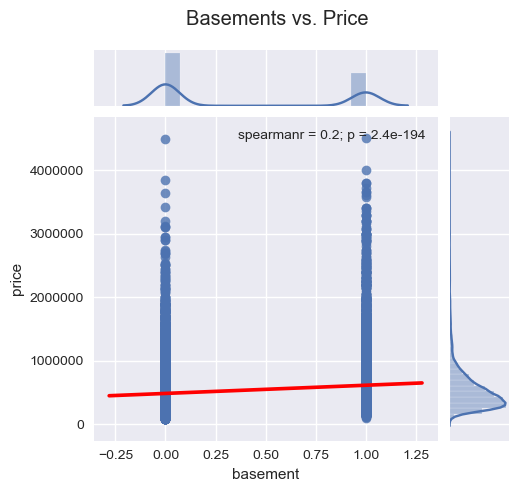

In [76]:
sns.jointplot(x=df.basement, y=df.price, data = df, stat_func=spearmanr, 
              kind='reg', height=5, joint_kws={'line_kws':{'color': 'red'}})
plt.subplots_adjust(top=0.90)
plt.suptitle('Basements vs. Price') 

As we can see, basement data - whether kept as numerical data on square footage, or transformed into binary data indicating whether a house has a basement or not, does not have a strong linear relationship with price.  We will remove `sqft_basement` and our new `basement` variable.

In [77]:
df = df.drop(['sqft_basement', 'basement'], axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21553 entries, 0 to 21596
Data columns (total 20 columns):
price          21553 non-null float64
bedrooms       21553 non-null int64
bathrooms      21553 non-null float64
sqft_living    21553 non-null int64
sqft_lot       21553 non-null int64
floors         21553 non-null float64
waterfront     21553 non-null int64
view           21553 non-null float64
condition      21553 non-null int64
grade          21553 non-null int64
yr_built       21553 non-null int64
location_1     21553 non-null uint8
location_2     21553 non-null uint8
location_3     21553 non-null uint8
location_4     21553 non-null uint8
location_5     21553 non-null uint8
location_6     21553 non-null uint8
location_7     21553 non-null uint8
location_8     21553 non-null uint8
location_9     21553 non-null uint8
dtypes: float64(4), int64(7), uint8(9)
memory usage: 2.2 MB


## A Closer Look at the Data, OLS Assumptions & Feature Engineering

In this stage we are going to examine each of our remaining independent variables to verify that the OLS assumptions are in place - Linearity, Normality, and Heterskedasticity of the residual terms. At this same stage we will normalize and scale the independent variables as necessary.  We will use sns.jointplots to examine linearity between each of the independent variables and the dependent variable `price`. 

### Exploring Each Variable through Jointplots, P-value, and Spearman and Pearson Correlation Coefficient

**Jointplot** - using seaborn's jointplot, we can visualize a scatterplot between each independent variable and our target variable, `price`, the distributions of each, a kde plot, and an added simple regression line all within the same visualization.

**Spearman Correlation Coefficient** - also called Spearman's rho or Spearman rank correlation, this provides a measure for the strength of the association between two variables, however it's not necessarily a direct test of linearity since it measures monotonic relationships (variables moving together but not necessarily in a linear manner).  The benefit of the Spearman Rank-Order Correlation is that it can be used on continuous and ordinal data cand can be used in cases where the assumptions of linearity, normality, and heterskedasticity are not met.

**Pearson's Correlation Coefficient** - this measures the strength of a linear relationship between two continuous variables. Similar to the Spearman Correlation Coefficient, the resulting output is a measure between 1 and negative 1, indicating the strength and direction of the relationship between the two variables.

**P-value** - this is the probability that we would have gotten the current correlation coefficient result if the correlation coefficient were actually 0, or the null hypothesis.  In order for the correlation coefficient to be considered statistically significant, the p-value must be lower then our desired threshold, usually 5% (P<0.05).

(*More info on both correlation coefficients can be found here: https://support.minitab.com/en-us/minitab-express/1/help-and-how-to/modeling-statistics/regression/supporting-topics/basics/a-comparison-of-the-pearson-and-spearman-correlation-methods/)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1c1c9199b0>,
      dtype=object)

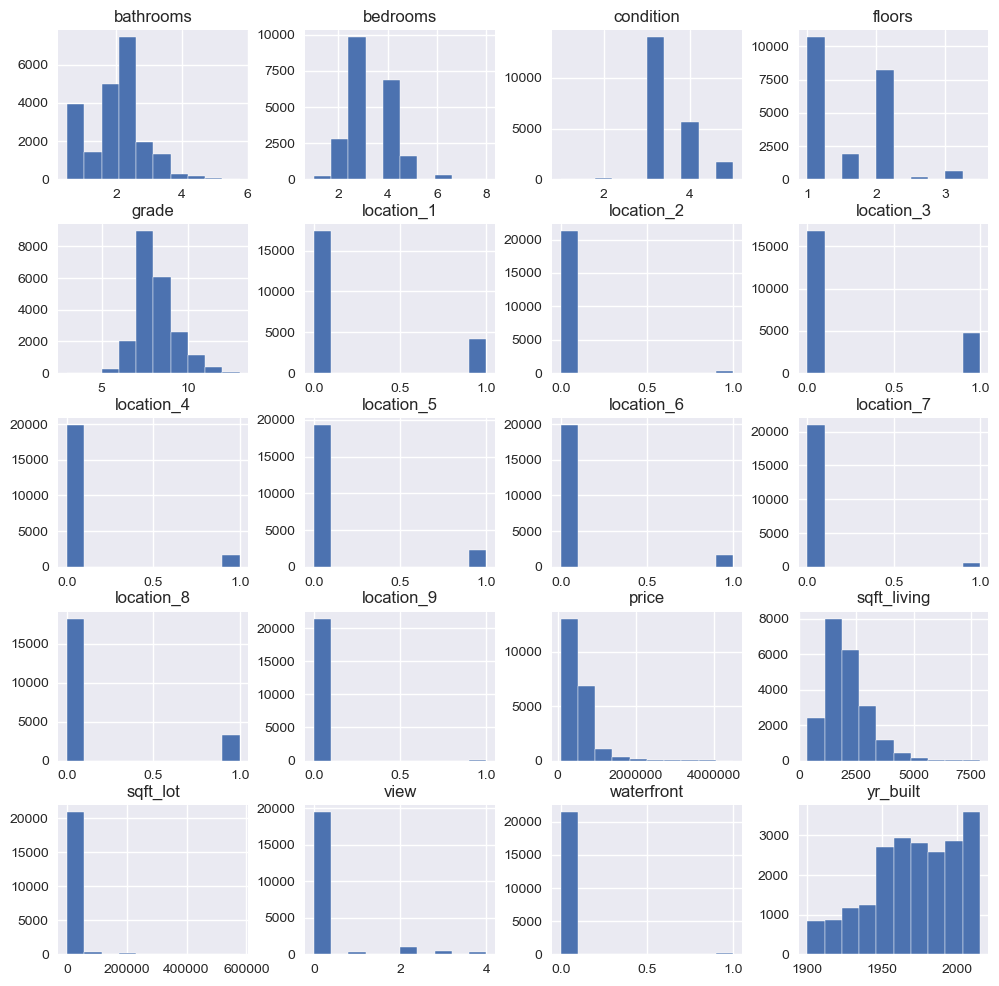

In [78]:
df.hist(figsize=(12,12))

In [79]:
df.columns

Index(['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'yr_built', 'location_1',
       'location_2', 'location_3', 'location_4', 'location_5', 'location_6',
       'location_7', 'location_8', 'location_9'],
      dtype='object')

In [80]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21553 entries, 0 to 21596
Data columns (total 20 columns):
price          21553 non-null float64
bedrooms       21553 non-null int64
bathrooms      21553 non-null float64
sqft_living    21553 non-null int64
sqft_lot       21553 non-null int64
floors         21553 non-null float64
waterfront     21553 non-null int64
view           21553 non-null float64
condition      21553 non-null int64
grade          21553 non-null int64
yr_built       21553 non-null int64
location_1     21553 non-null uint8
location_2     21553 non-null uint8
location_3     21553 non-null uint8
location_4     21553 non-null uint8
location_5     21553 non-null uint8
location_6     21553 non-null uint8
location_7     21553 non-null uint8
location_8     21553 non-null uint8
location_9     21553 non-null uint8
dtypes: float64(4), int64(7), uint8(9)
memory usage: 2.2 MB


**Note:** variables that should be considered categorical are: `view`, `waterfront`, `condition`, `grade`, all the location variables, and `yr_built`. Conversely, the variables that are continuous and will require normalization scaling are: `price`, `bedrooms`, `bathrooms`, `sqft_living`, `sqft_lot`, and `floors`.

### `yr_built`

Starting from the end, let's look at `yr_built` to see what kind of relationship there is with `price` and how best to present the data in `yr_built`.

Text(0.5, 0.98, 'Year Built & Price')

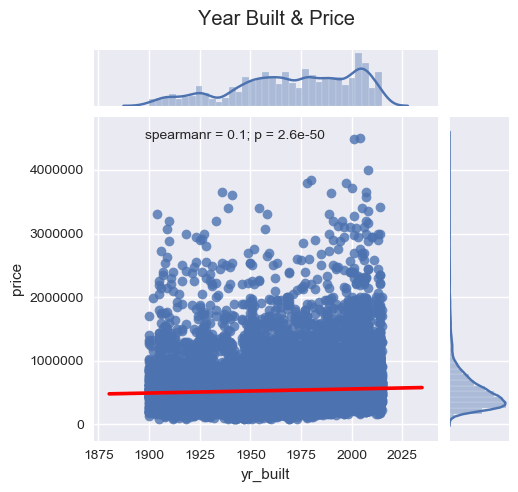

In [81]:
sns.jointplot(x=df.yr_built, y=df.price, data=df, stat_func=spearmanr, kind='reg', 
              label="Year Built", height=5, joint_kws={'line_kws':{'color': 'red'}})

#to add a title
plt.subplots_adjust(top=0.9)
plt.suptitle('Year Built & Price') 

We can see above that it's difficult to see a strong relationship between year built and price. We'll try examining the mean price per year against price, to see if more of a trend can be established.

(credit: https://github.com/arcaputo3/dsc-1-final-project-online-ds-sp-000/blob/master/student.ipynb)

Text(0.5, 1.0, 'Year Built vs. Mean Annual Price ($)')

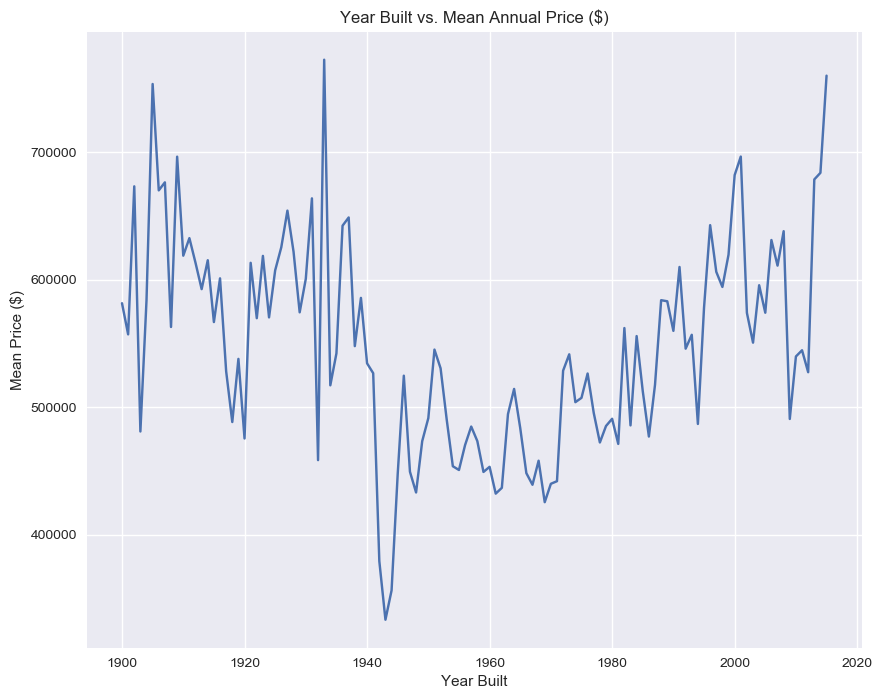

In [82]:
plt.figure(figsize=(10, 8))
plt.plot(df.groupby('yr_built')['price'].mean())
plt.xlabel('Year Built')
plt.ylabel('Mean Price ($)')
plt.title('Year Built vs. Mean Annual Price ($)')

This definitely shows more of a trend over the years, but it's noisy and not entirely linear. We will proceed with binning the `yr_built` variable to see if this helps smooth out the data and retain any predictive power from this data. 

In [83]:
# Printing the full range of dates available in our data
print(df.yr_built.min(), df.yr_built.max())

1900 2015


Based on the available data, we will bin the data into decades.

In [84]:
# binning data into decades
bins = list(range(1899, 2020, 10))
#using pd.cut
bins_yr_built = pd.cut(df.yr_built, bins)

In [85]:
# now we include this into our dataframe and change the data type to category
df['yr_built'] = bins_yr_built.astype('category')

Text(0.5, 1.0, 'Year Built (by decade) and Price')

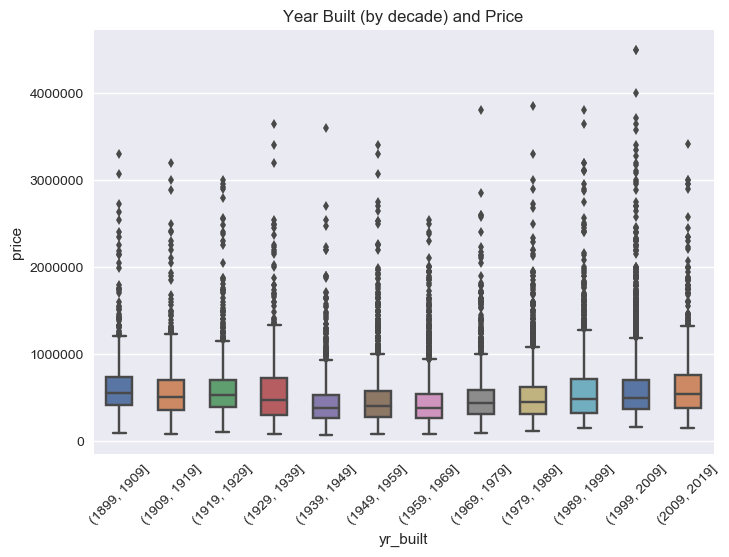

In [86]:
bplot = sns.boxplot(x="yr_built", y="price", 
                   data=df, width=0.5, palette="deep")
plt.xticks(rotation=45)
plt.title('Year Built (by decade) and Price')

We can see that across the decades, price contains a number of high outliers, with the highest peak in outliers in the decade 1999-2009, leading up to the major financial crisis in the US, where the housing market collapsed.  Let's visualize our newly binned `yr_built` data another way - through categorical scatterplots against `price` adding in a categorical data on `view` as well.

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 <a list of 12 Text xticklabel objects>)

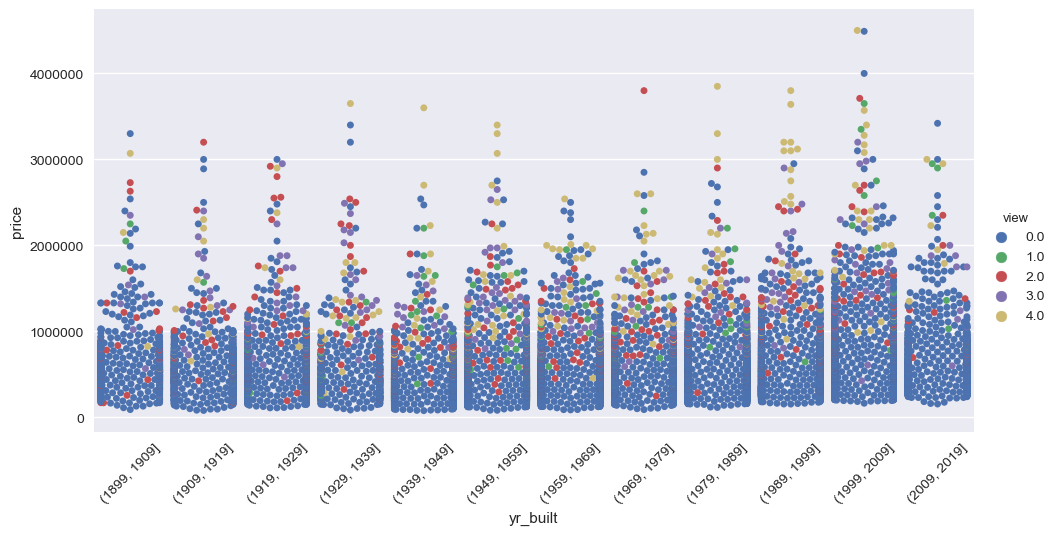

In [87]:
sns.catplot(x="yr_built", y="price", hue="view", kind="swarm", data=df, height=5, aspect=2);
plt.xticks(rotation=45)

In [88]:
# now to get dummies for each of the decade bins
df = pd.get_dummies(df, drop_first=True)

In [89]:
# just to confirm
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21553 entries, 0 to 21596
Data columns (total 30 columns):
price                    21553 non-null float64
bedrooms                 21553 non-null int64
bathrooms                21553 non-null float64
sqft_living              21553 non-null int64
sqft_lot                 21553 non-null int64
floors                   21553 non-null float64
waterfront               21553 non-null int64
view                     21553 non-null float64
condition                21553 non-null int64
grade                    21553 non-null int64
location_1               21553 non-null uint8
location_2               21553 non-null uint8
location_3               21553 non-null uint8
location_4               21553 non-null uint8
location_5               21553 non-null uint8
location_6               21553 non-null uint8
location_7               21553 non-null uint8
location_8               21553 non-null uint8
location_9               21553 non-null uint8
yr_built_

### `waterfront`

Let's take a closer look at `Waterfront`.

In [90]:
df.waterfront.value_counts()

0    21411
1      142
Name: waterfront, dtype: int64

In [91]:
print("Percentage of houses that are NOT on the waterfront:",
     (len(df.loc[df.waterfront == 0]))/df.shape[0])

Percentage of houses that are NOT on the waterfront: 0.99341159003387


Text(0.5, 0.98, 'Waterfront Houses & Price')

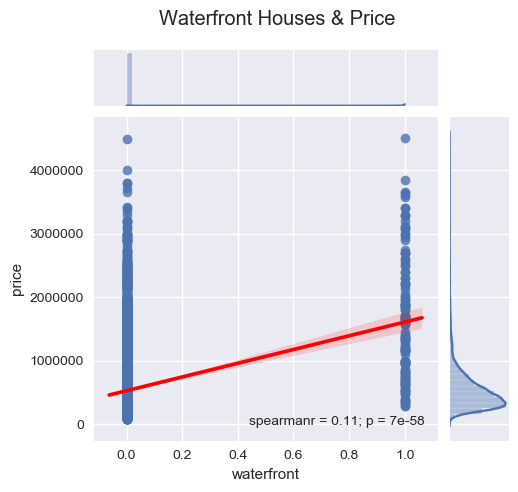

In [92]:
sns.jointplot(x=df.waterfront, y=df.price, data=df, kind='reg', stat_func=spearmanr,  
              height=5, joint_kws={'line_kws':{'color':'red'}})
plt.subplots_adjust(top=0.9)
plt.suptitle('Waterfront Houses & Price') 

Based on the above, we can see that there is a weak positive correlation between`waterfront` and `price`, as confirmed by the Spearman coefficient. Although the regression is positive, the correlation is weak. This may have to do with the fact that 99% of the houses are not on the waterfront.  Given the weak positive correlation, we will drop `waterfront` from our model.

In [93]:
df=df.drop("waterfront", axis=1)

### `view`

#### **Question 3:** 
Is there a stronger relationship between `view` and `price` if we consider *how many* times a house has been viewed versus *whether or not* a house has been viewed at all?

Let's start out by taking a look at `view` and `price`.

Text(0.5, 0.98, 'View & Price')

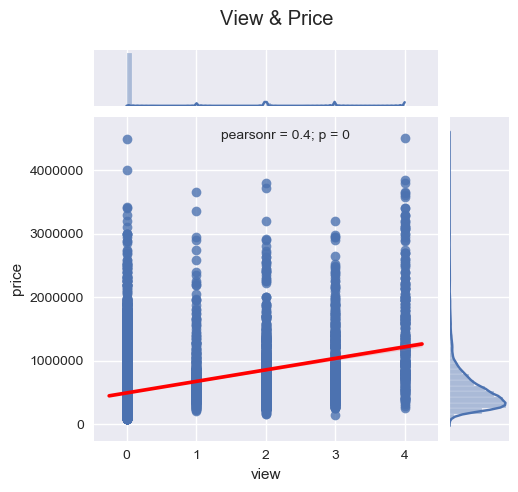

In [94]:
sns.jointplot(x=df.view, y=df.price, data=df, kind='reg', stat_func=pearsonr,  
              height=5, joint_kws={'line_kws':{'color':'red'}})
plt.subplots_adjust(top=0.9)
plt.suptitle('View & Price') 

The relationship between `view` and `price` is also a moderate uphill linear relationship with a pearson coefficient of 40%. Let's turn `view` into a binary variable and see if there is a stronger correlation and linear relationship with price.

In [95]:
#adding a binary view variable
df['view_binary'] = (df['view'] > 0).astype('uint8')

Text(0.5, 0.98, 'View & Price')

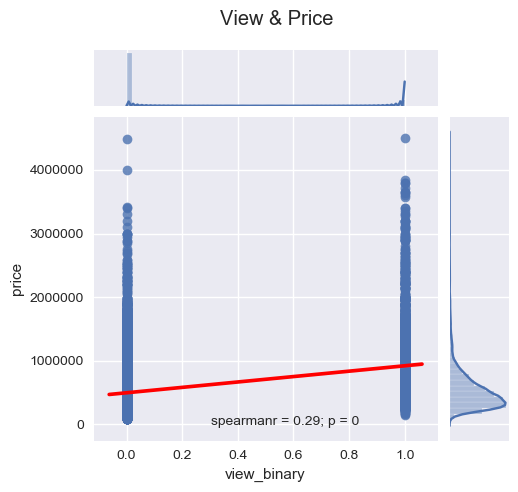

In [96]:
#looking at the binary view variable's relationship with price
sns.jointplot(x=df.view_binary, y=df.price, data=df, kind='reg', stat_func=spearmanr,  
              height=5, joint_kws={'line_kws':{'color':'red'}})
plt.subplots_adjust(top=0.9)
plt.suptitle('View & Price') 

We can see that the correlation coefficient is even weaker than before. Let's remove the binary variable and convert `view` into a categorical variable and one-hot-encode.

In [97]:
df = df.drop('view_binary', axis=1)

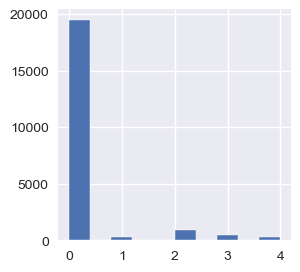

In [98]:
df.view.hist(figsize=(3,3))

In [99]:
#let's convert view to categorical and then one-hot encode
df.view = df.view.astype('category')
df = pd.get_dummies(df, drop_first=True)

In [100]:
df.columns

Index(['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'condition', 'grade', 'location_1', 'location_2', 'location_3',
       'location_4', 'location_5', 'location_6', 'location_7', 'location_8',
       'location_9', 'yr_built_(1909, 1919]', 'yr_built_(1919, 1929]',
       'yr_built_(1929, 1939]', 'yr_built_(1939, 1949]',
       'yr_built_(1949, 1959]', 'yr_built_(1959, 1969]',
       'yr_built_(1969, 1979]', 'yr_built_(1979, 1989]',
       'yr_built_(1989, 1999]', 'yr_built_(1999, 2009]',
       'yr_built_(2009, 2019]', 'view_1.0', 'view_2.0', 'view_3.0',
       'view_4.0'],
      dtype='object')

### `condition`

Text(0.5, 0.98, 'Condition & Price')

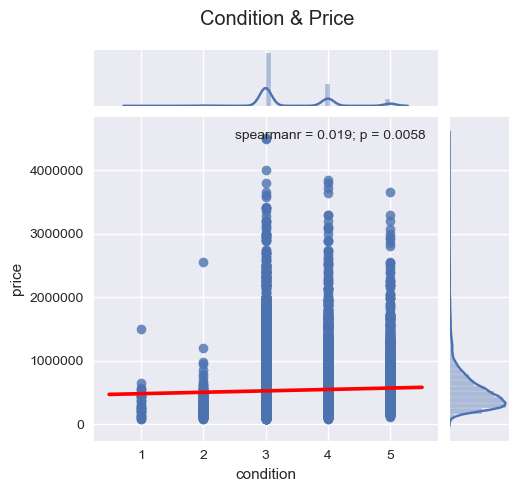

In [101]:
sns.jointplot(x=df.condition, y=df.price, data=df, kind='reg', stat_func=spearmanr,  
              height=5, joint_kws={'line_kws':{'color':'red'}})
plt.subplots_adjust(top=0.9)
plt.suptitle('Condition & Price') 

In [102]:
df.condition.value_counts()

3    13987
4     5669
5     1699
2      169
1       29
Name: condition, dtype: int64

We can see above that `condition` as a very weak uphill relationship with `price`. We will remove `condition` from our dataset.

In [103]:
df = df.drop('condition', axis=1)

In [104]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21553 entries, 0 to 21596
Data columns (total 31 columns):
price                    21553 non-null float64
bedrooms                 21553 non-null int64
bathrooms                21553 non-null float64
sqft_living              21553 non-null int64
sqft_lot                 21553 non-null int64
floors                   21553 non-null float64
grade                    21553 non-null int64
location_1               21553 non-null uint8
location_2               21553 non-null uint8
location_3               21553 non-null uint8
location_4               21553 non-null uint8
location_5               21553 non-null uint8
location_6               21553 non-null uint8
location_7               21553 non-null uint8
location_8               21553 non-null uint8
location_9               21553 non-null uint8
yr_built_(1909, 1919]    21553 non-null uint8
yr_built_(1919, 1929]    21553 non-null uint8
yr_built_(1929, 1939]    21553 non-null uint8
yr_built_(1

### `grade`

Text(0.5, 0.98, 'Grade & Price')

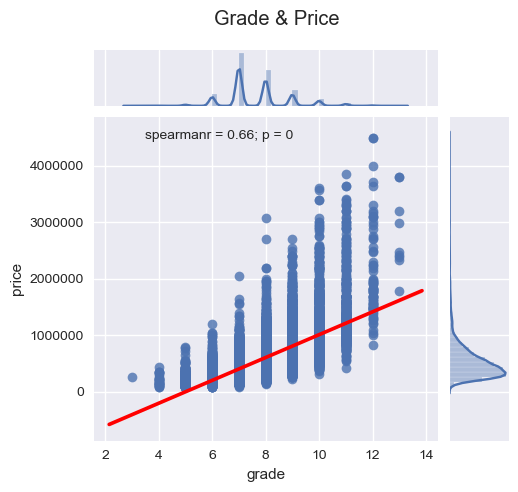

In [105]:
sns.jointplot(x=df.grade, y=df.price, data=df, kind='reg', stat_func=spearmanr,  
              height=5, joint_kws={'line_kws':{'color':'red'}})
plt.subplots_adjust(top=0.9)
plt.suptitle('Grade & Price') 

`grade` has a linear relationship with `price`, a moderate uphill correlation confirmed by the spearman coefficient.  We will retain this variable by first changing its type to categorical data and then one-hot-encoding.

In [106]:
df.grade = df.grade.astype('category')

In [107]:
df = pd.get_dummies(df, drop_first=True)

In [108]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21553 entries, 0 to 21596
Data columns (total 40 columns):
price                    21553 non-null float64
bedrooms                 21553 non-null int64
bathrooms                21553 non-null float64
sqft_living              21553 non-null int64
sqft_lot                 21553 non-null int64
floors                   21553 non-null float64
location_1               21553 non-null uint8
location_2               21553 non-null uint8
location_3               21553 non-null uint8
location_4               21553 non-null uint8
location_5               21553 non-null uint8
location_6               21553 non-null uint8
location_7               21553 non-null uint8
location_8               21553 non-null uint8
location_9               21553 non-null uint8
yr_built_(1909, 1919]    21553 non-null uint8
yr_built_(1919, 1929]    21553 non-null uint8
yr_built_(1929, 1939]    21553 non-null uint8
yr_built_(1939, 1949]    21553 non-null uint8
yr_built_(1

### `sqft_lot` and `sqft_living`

If we take a look at `sqft_lot`, `sqft_living`, and `price` we can see normalization and scaling are needed.

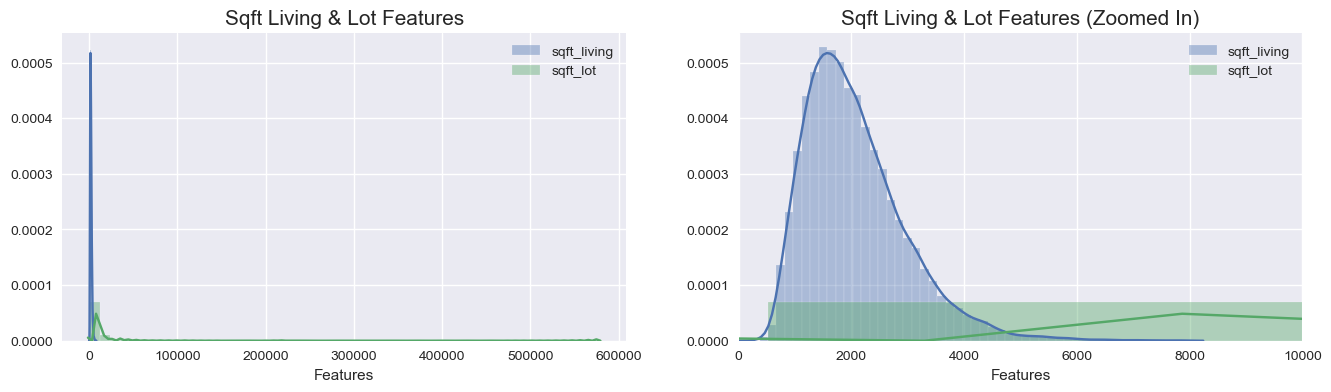

In [109]:
# to visualize the difference in scales and lack of normality in the data
plt.figure(figsize=(16,4))
plt.subplot(121)
sns.distplot(df.sqft_living, label='sqft_living')
sns.distplot(df.sqft_lot, label='sqft_lot')
plt.title('Sqft Living & Lot Features', fontdict={'fontsize':15})
plt.xlabel('Features')
plt.legend()

#and if we zoom in closely
plt.subplot(122)
sns.distplot(df.sqft_living, label='sqft_living')
sns.distplot(df.sqft_lot, label='sqft_lot')
plt.title('Sqft Living & Lot Features (Zoomed In)', fontdict={'fontsize':15})
plt.xlabel('Features')
plt.xlim(1,10000)
plt.legend()

(credit: https://github.com/arseniyturin/dsc-1-final-project-online-ds-sp-000/blob/master/student.ipynb)

We will log transform each of these variables.

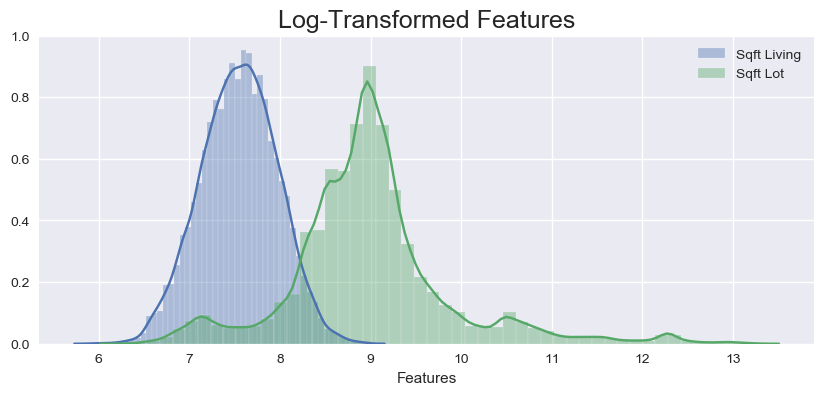

In [110]:
# Create log-transformed variables
log_sqft_living = np.log(df.sqft_living)
log_sqft_lot = np.log(df.sqft_lot)

#visualizing them in the same plot
plt.figure(figsize=(10,4))
#sns.distplot(df.price, label="Price")
sns.distplot(log_sqft_living, label="Sqft Living")
sns.distplot(log_sqft_lot, label="Sqft Lot")

plt.title("Log-Transformed Features", fontdict={'fontsize':18})
plt.xlabel('Features')
plt.legend()

These are looking much more normally distributed now. 

In [111]:
#now put in our dataset
df['sqft_living_log'] = log_sqft_living
df['sqft_lot_log'] = log_sqft_lot
df.head()

price  bedrooms  bathrooms  sqft_living  sqft_lot  floors  location_1  \
0  221900.0         3       1.00         1180      5650     1.0           0   
1  538000.0         3       2.25         2570      7242     2.0           1   
2  180000.0         2       1.00          770     10000     1.0           0   
3  604000.0         4       3.00         1960      5000     1.0           0   
4  510000.0         3       2.00         1680      8080     1.0           0   

   location_2  location_3  location_4      ...       grade_6  grade_7  \
0           0           1           0      ...             0        1   
1           0           0           0      ...             0        1   
2           0           0           0      ...             1        0   
3           0           0           0      ...             0        1   
4           0           0           0      ...             0        0   

   grade_8  grade_9  grade_10  grade_11  grade_12  grade_13  sqft_living_log  \
0        0        0         0         0         0         0         7.073270   
1        0        0         0         0         0         0         7.851661   
2        0        0         0         0         0         0         6.646391   
3        0        0         0         0         0         0         7.580700   
4        1        0         0         0         0         0         7.426549   

   sqft_lot_log  
0      8.639411  
1      8.887653  
2      9.210340  
3      8.517193  
4      8.997147  

[5 rows x 42 columns]

While we still have both the log versions of the three variables and their originals in the dataframe, let's compare their correlations with price.

In [112]:
df[['sqft_living', 'sqft_living_log', 'sqft_lot', 'sqft_lot_log', 'price']].corr()

sqft_living  sqft_living_log  sqft_lot  sqft_lot_log  \
sqft_living         1.000000         0.959883  0.189218      0.341699   
sqft_living_log     0.959883         1.000000  0.168259      0.323256   
sqft_lot            0.189218         0.168259  1.000000      0.702139   
sqft_lot_log        0.341699         0.323256  0.702139      1.000000   
price               0.693384         0.617839  0.091541      0.155788   

                    price  
sqft_living      0.693384  
sqft_living_log  0.617839  
sqft_lot         0.091541  
sqft_lot_log     0.155788  
price            1.000000

Above, we can see that `sqft_living` and its log-transformed counterpart have a decent positive correlation with price (~62-69%), although `sqft_living_log` has a lower correlation with `price`. We will proceed with the log-transformed variables to comply with the normality assumption for linear regressions, and we will remove the original pre-transformed variables now. But first, we'll quickly examine `sqft_lot_log` and `sqft_living_log` to decide on whether to keep this variable given the weak linear relationship.

Text(0.5, 0.98, '(Log) Sqft Lot & Price')

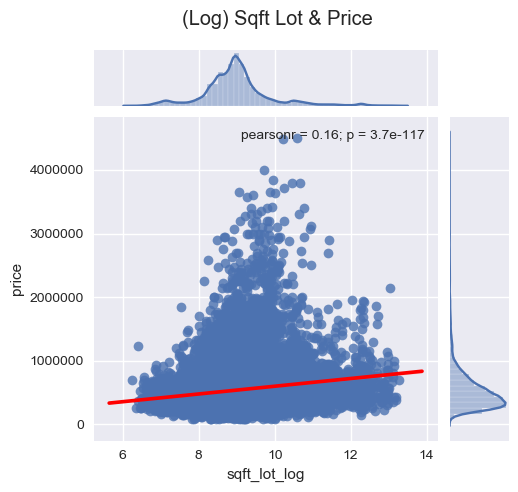

In [113]:
sns.jointplot(x=df.sqft_lot_log, y=df.price, data=df, kind='reg', stat_func=pearsonr,  
              height=5, joint_kws={'line_kws':{'color':'red'}})
plt.subplots_adjust(top=0.9)
plt.suptitle('(Log) Sqft Lot & Price') 

We can see that this is a very weak uphill linear relationship between `sqft_lot` and `price` so we will remove since it doesn't fully satisfy the linearity assumption.

Text(0.5, 0.98, '(Log) Sqft Living & Price')

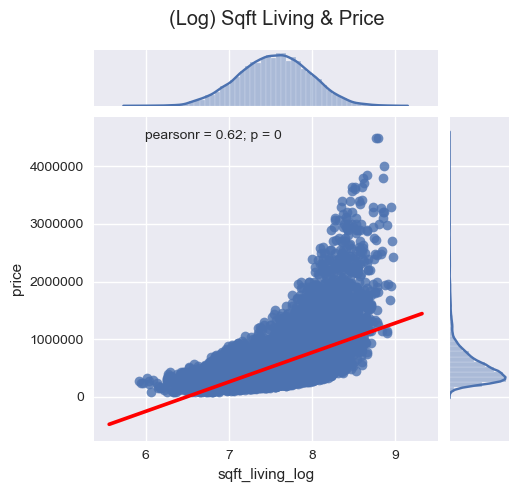

In [114]:
sns.jointplot(x=df.sqft_living_log, y=df.price, data=df, kind='reg', stat_func=pearsonr,  
              height=5, joint_kws={'line_kws':{'color':'red'}})
plt.subplots_adjust(top=0.9)
plt.suptitle('(Log) Sqft Living & Price')

In [115]:
#dropping the original variables and sqft_lot_log
df = df.drop(['sqft_lot', 'sqft_living', 'sqft_lot_log'], axis=1)

In [116]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21553 entries, 0 to 21596
Data columns (total 39 columns):
price                    21553 non-null float64
bedrooms                 21553 non-null int64
bathrooms                21553 non-null float64
floors                   21553 non-null float64
location_1               21553 non-null uint8
location_2               21553 non-null uint8
location_3               21553 non-null uint8
location_4               21553 non-null uint8
location_5               21553 non-null uint8
location_6               21553 non-null uint8
location_7               21553 non-null uint8
location_8               21553 non-null uint8
location_9               21553 non-null uint8
yr_built_(1909, 1919]    21553 non-null uint8
yr_built_(1919, 1929]    21553 non-null uint8
yr_built_(1929, 1939]    21553 non-null uint8
yr_built_(1939, 1949]    21553 non-null uint8
yr_built_(1949, 1959]    21553 non-null uint8
yr_built_(1959, 1969]    21553 non-null uint8
yr_built_(1

### `bedrooms`,  `bathrooms`, and `floors`

In [117]:
df[['bedrooms', 'bathrooms', 'floors', 'price']].corr()

bedrooms  bathrooms    floors     price
bedrooms   1.000000   0.524171  0.181171  0.316298
bathrooms  0.524171   1.000000  0.505163  0.516658
floors     0.181171   0.505163  1.000000  0.262026
price      0.316298   0.516658  0.262026  1.000000

The above shows that of the three variables, `bathrooms` has the strongest correlation with price, but even then it's considered moderate.  Let's look more closely at each of the variables' relationships with `price`.

Text(0.5, 0.98, 'Bedrooms & Price')

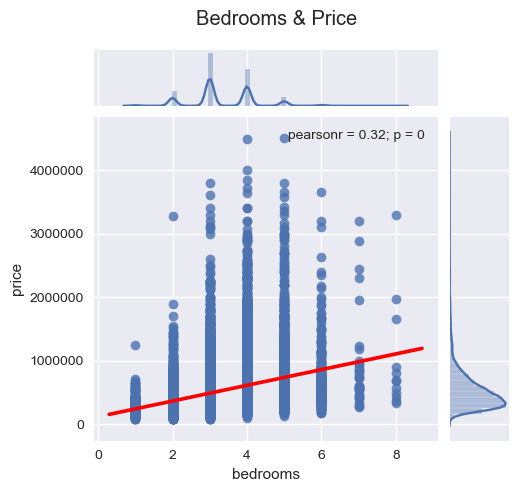

In [118]:
# bedrooms and price
sns.jointplot(x=df.bedrooms, y=df.price, data=df, stat_func=pearsonr, 
              kind='reg', height=5, joint_kws={'line_kws':{'color':'red'}})
plt.subplots_adjust(top=0.90)
plt.suptitle('Bedrooms & Price') 

The above shows that there is a weak uphill correlation between `bedrooms` and `price`, and that this correlation is statistically significant.  `bedrooms` appears multimodal, but for now we will leave it as is in our model.

In [119]:
df.bedrooms.value_counts()

3    9821
4    6876
2    2756
5    1588
6     268
1     196
7      36
8      12
Name: bedrooms, dtype: int64

Text(0.5, 0.98, 'Floors & Price')

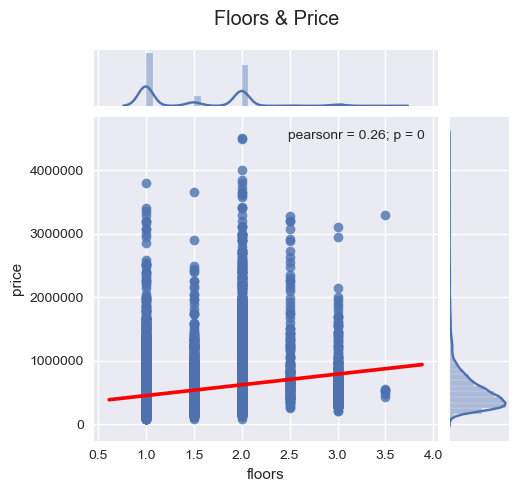

In [120]:
# Looking at floors and price
sns.jointplot(x=df.floors, y=df.price, data=df, stat_func=pearsonr, 
              kind='reg', height=5, joint_kws={'line_kws':{'color':'red'}})
plt.subplots_adjust(top=0.90)
plt.suptitle('Floors & Price') 

Similarly to `bedrooms` we can see that `floors` has a weak positive correlation with price, which is also statistically significant. It appears to be bimodal, and the values indicate that this variable provides discrete data.  We will leave as is for now.

Text(0.5, 0.98, 'Bathroom & Price')

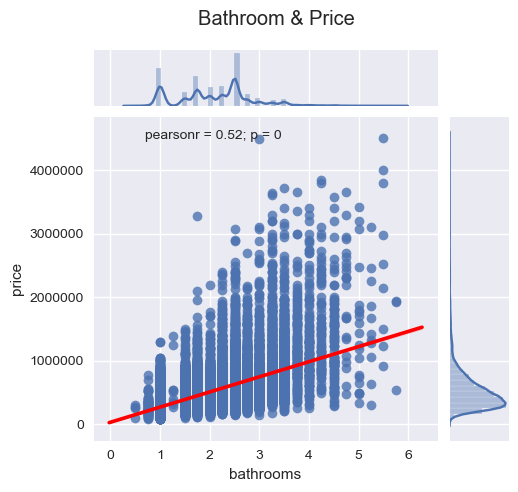

In [121]:
#bathrooms and price
sns.jointplot(x=df.bathrooms, y=df.price, data=df, stat_func=pearsonr, 
              kind='reg', height=5, joint_kws={'line_kws':{'color':'red'}})
plt.subplots_adjust(top=0.90)
plt.suptitle('Bathroom & Price') 

As we saw earlier with the correlation matrix, `bathrooms` has the highest/strongest correlation with `price` out of these three variables and this positive correlation is statistically significant.  Similarly to `floors` the values represented here are also discrete values, as it is a common feature of housing descriptions to indicate the number of bathrooms and various kinds, meaning full, half, and quarter baths (depends on availability of certain WASH features).  Given this, we will not log-transform `bathrooms`.

In [122]:
df.bathrooms.value_counts()

2.50    5374
1.00    3849
1.75    3047
2.25    2047
2.00    1927
1.50    1445
2.75    1185
3.00     748
3.50     730
3.25     586
3.75     155
4.00     134
4.50      97
4.25      79
0.75      71
4.75      23
5.00      20
5.25      11
5.50       9
1.25       9
0.50       4
5.75       3
Name: bathrooms, dtype: int64

Each of these variables has a statistically significant relationship with `price`, however `bathrooms` shows the strongest correlation, followed by `bedrooms` and then `floors`.  We will keep them for the moment, but let's take another look at multicollinearity amongst our features to confirm that we are in line with the no multicollinearity assumption for our model.

## One more look at multicollinearity for some of the features

In [123]:
df.columns

Index(['price', 'bedrooms', 'bathrooms', 'floors', 'location_1', 'location_2',
       'location_3', 'location_4', 'location_5', 'location_6', 'location_7',
       'location_8', 'location_9', 'yr_built_(1909, 1919]',
       'yr_built_(1919, 1929]', 'yr_built_(1929, 1939]',
       'yr_built_(1939, 1949]', 'yr_built_(1949, 1959]',
       'yr_built_(1959, 1969]', 'yr_built_(1969, 1979]',
       'yr_built_(1979, 1989]', 'yr_built_(1989, 1999]',
       'yr_built_(1999, 2009]', 'yr_built_(2009, 2019]', 'view_1.0',
       'view_2.0', 'view_3.0', 'view_4.0', 'grade_4', 'grade_5', 'grade_6',
       'grade_7', 'grade_8', 'grade_9', 'grade_10', 'grade_11', 'grade_12',
       'grade_13', 'sqft_living_log'],
      dtype='object')

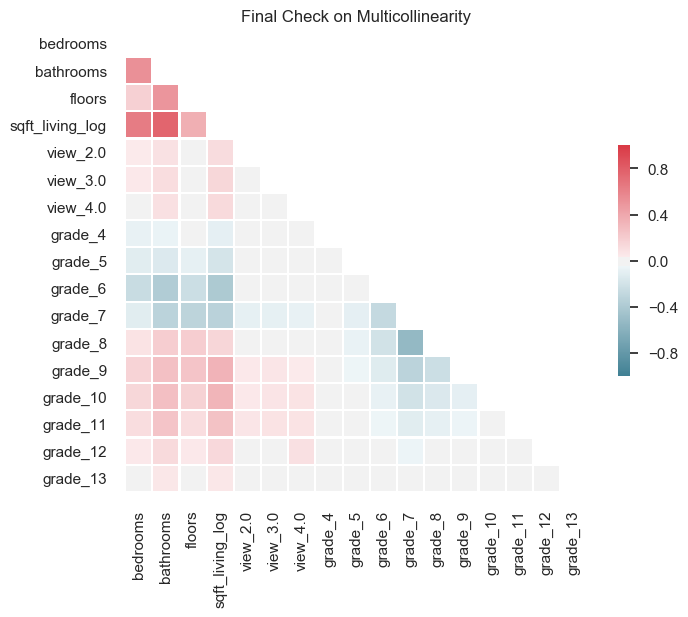

In [124]:
sns.set(style="white")

# Compute correlation matrix, not including year built
corr = df[['bedrooms', 'bathrooms', 'floors', 'sqft_living_log', 'view_2.0', 
           'view_3.0', 'view_4.0', 'grade_4', 'grade_5', 'grade_6', 'grade_7', 'grade_8', 
           'grade_9', 'grade_10', 'grade_11', 'grade_12', 'grade_13']].corr()

# Generate a mask for upper triangle
mask = np.zeros_like(corr,dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# set up the matplot figure
f, ax = plt.subplots(figsize=(8,6))

# set up custom diverging map
cmap = sns.diverging_palette(220,10,as_cmap=True)

# make the heatmap with the correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=1, vmin=-1,
           center=0, square=True, linewidths=.8, cbar_kws={"shrink": .5})
plt.title('Final Check on Multicollinearity')
plt.show()

It looks like we have some covariance amongst `sqft_living_log`, `bathroom`, `bedrooms`, and `floors`.

In [125]:
df[['sqft_living_log', 'bathrooms', 'floors', 'bedrooms', 'price']].corr()

sqft_living_log  bathrooms    floors  bedrooms     price
sqft_living_log         1.000000   0.759979  0.365943  0.638728  0.617839
bathrooms               0.759979   1.000000  0.505163  0.524171  0.516658
floors                  0.365943   0.505163  1.000000  0.181171  0.262026
bedrooms                0.638728   0.524171  0.181171  1.000000  0.316298
price                   0.617839   0.516658  0.262026  0.316298  1.000000

`bathrooms` and `sqft_living_log` are highly correlated at 76%. Since `sqft_living_log` has a higher correlation with `price` than `bathrooms` does, we will remove `bathrooms` from our final dataset for modeling, otherwise we might be artificially increasing the R-squared in our model. `bedrooms` and `sqft_living_log` are also moderately correlated at 64%, but this is not considered a severe correlation between the two features.

In [126]:
df = df.drop('bathrooms', axis=1)

In [127]:
#confirm that we have our data in the correct data types
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21553 entries, 0 to 21596
Data columns (total 38 columns):
price                    21553 non-null float64
bedrooms                 21553 non-null int64
floors                   21553 non-null float64
location_1               21553 non-null uint8
location_2               21553 non-null uint8
location_3               21553 non-null uint8
location_4               21553 non-null uint8
location_5               21553 non-null uint8
location_6               21553 non-null uint8
location_7               21553 non-null uint8
location_8               21553 non-null uint8
location_9               21553 non-null uint8
yr_built_(1909, 1919]    21553 non-null uint8
yr_built_(1919, 1929]    21553 non-null uint8
yr_built_(1929, 1939]    21553 non-null uint8
yr_built_(1939, 1949]    21553 non-null uint8
yr_built_(1949, 1959]    21553 non-null uint8
yr_built_(1959, 1969]    21553 non-null uint8
yr_built_(1969, 1979]    21553 non-null uint8
yr_built_(197

In [128]:
#how many variables do we have left for our model?
print(len(df.columns))
df.columns

38


Index(['price', 'bedrooms', 'floors', 'location_1', 'location_2', 'location_3',
       'location_4', 'location_5', 'location_6', 'location_7', 'location_8',
       'location_9', 'yr_built_(1909, 1919]', 'yr_built_(1919, 1929]',
       'yr_built_(1929, 1939]', 'yr_built_(1939, 1949]',
       'yr_built_(1949, 1959]', 'yr_built_(1959, 1969]',
       'yr_built_(1969, 1979]', 'yr_built_(1979, 1989]',
       'yr_built_(1989, 1999]', 'yr_built_(1999, 2009]',
       'yr_built_(2009, 2019]', 'view_1.0', 'view_2.0', 'view_3.0', 'view_4.0',
       'grade_4', 'grade_5', 'grade_6', 'grade_7', 'grade_8', 'grade_9',
       'grade_10', 'grade_11', 'grade_12', 'grade_13', 'sqft_living_log'],
      dtype='object')

In [129]:
#making a copy of our clean, final data to use for our first model
df_model = df.copy()

## Summary of Explore Stage

Building off the Scrub stage, we identified additional areas where our data needed to be cleaned and transformed. We began by taking an initial look at covariance in our independent variables to remove any problematic variables. We also dropped columns containing data that did not contribute to our model in any significant way, for instance `date` and `id`. We then took a closer look at each of the remaining variables to understand how best to retain the information each column presented, namely how to deal with location info and year built and renovated info. We also examined their relationships with `price` to verify that they show a statistically significant linear relationship, while keeping an eye on normality in the distributions (using seaborn jointplots).

**Summary of Actions:**
- Dropped `date` because it only covers a little over a year and likely does not provide enough data to see a strong relationship with `price` over time.
- Dropped `id` as this is not a useful variable for predictive purposes.
- Dropped `sqft_above` because of high correlation with `sqft_living`.
- Dropped `sqft_living15` and `sqft_lot15` due to high correlation with `sqft_living` and `sqft_lot` respectively.
- Dropped `zipcode`, `lat`, and `long` after creating a new `location` column which represents location info in a much more useful and manageable way.
- Dropped `yr_renovated` after changing the data into a binary variable to indicate whether or not the house has been renovated (based on the fact that most houses have not been renovated and therefore do not have a year value); we dropped the binary variable `renovated` after determining that it did not present evidence of a strong enough linear relationship with `price`.
- Dropped `sqft_basement` and the created boolean variable `basement` after showing weak correlation with `price`.
- Binned `yr_built` data into decades to smooth out the relationship with `price` over time.
- Dropped `waterfront` after verifying weak linear relationship with `price`.
- Converted `view`, `condition`, and `grade` into categorical data and then one-hot-encoded.
- Log-transformed `sqft_lot` and `sqft_living` to normalize their distributions.
- Dropped `sqft_lot` after confirming weak linear relationship with `price`.
- Dropped `bathrooms` after re-examining multicollinearity and confirming that `sqft_living` and `bathrooms` were highly correlated.

# **Model**

We will begin by running OLS in statsmodels using all 38 of our variables, followed by a quick interpretation on key model metrics. We will then employ Feature Ranking with Recursive Feature Elimination to select the strongest variables to retain in our model. We will also use train_test_split to evaluate our model and the residuals, before RFE and with RFE. Finally, we will use K-Folds Cross Validation as yet another evaluation of our model.

## Model 1 - OLS

We will start by running OLS on our current model data.

In [130]:
outcome = df_model["price"]
predictors = df_model.drop("price", axis=1)

In [131]:
predictors.shape

(21553, 37)

In [132]:
# we are adding the constant 
predictors_int = sm.add_constant(predictors)
model = sm.OLS(df_model['price'], predictors_int).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.727
Model:                            OLS   Adj. R-squared:                  0.727
Method:                 Least Squares   F-statistic:                     1552.
Date:                Sun, 16 Jun 2019   Prob (F-statistic):               0.00
Time:                        15:21:17   Log-Likelihood:            -2.9162e+05
No. Observations:               21553   AIC:                         5.833e+05
Df Residuals:                   21515   BIC:                         5.836e+05
Df Model:                          37                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                 -1.245e+06   1.86e+05     -6.709      0.000   -1.61e+06   -8.81e+05
bedrooms              -6687.1782   1895.481     -3.528      0.000   -1.04e+04   -2971.894
floors                  1.24e+04   3413.270      3.633      0.000    5711.530    1.91e+04
location_1             5.117e+04   5166.094      9.905      0.000     4.1e+04    6.13e+04
location_2             2.085e+05   1.17e+04     17.770      0.000    1.85e+05    2.31e+05
location_3            -1.246e+05   4560.519    -27.315      0.000   -1.34e+05   -1.16e+05
location_4            -1.806e+05   5881.756    -30.697      0.000   -1.92e+05   -1.69e+05
location_5            -6.545e+04   5801.183    -11.283      0.000   -7.68e+04   -5.41e+04
location_6             6.484e+04   6259.887     10.358      0.000    5.26e+04    7.71e+04
location_7             1.299e+05   8562.505     15.172      0.000    1.13e+05    1.47e+05
location_8             1.121e+05   4881.571     22.963      0.000    1.03e+05    1.22e+05
location_9            -7.198e+04   1.76e+04     -4.100      0.000   -1.06e+05   -3.76e+04
yr_built_(1909, 1919]  -1.04e+04   9723.230     -1.070      0.285   -2.95e+04    8659.242
yr_built_(1919, 1929] -4304.3064   9022.425     -0.477      0.633    -2.2e+04    1.34e+04
yr_built_(1929, 1939] -1.936e+04   1.09e+04     -1.775      0.076   -4.07e+04    2013.169
yr_built_(1939, 1949] -5.487e+04   8729.232     -6.286      0.000    -7.2e+04   -3.78e+04
yr_built_(1949, 1959] -9.053e+04   8504.264    -10.645      0.000   -1.07e+05   -7.39e+04
yr_built_(1959, 1969] -1.263e+05   8684.732    -14.540      0.000   -1.43e+05   -1.09e+05
yr_built_(1969, 1979] -1.619e+05   8832.971    -18.332      0.000   -1.79e+05   -1.45e+05
yr_built_(1979, 1989] -1.674e+05   8856.105    -18.908      0.000   -1.85e+05    -1.5e+05
yr_built_(1989, 1999] -2.141e+05   8980.691    -23.839      0.000   -2.32e+05   -1.96e+05
yr_built_(1999, 2009] -1.713e+05   8595.693    -19.933      0.000   -1.88e+05   -1.54e+05
yr_built_(2009, 2019] -1.331e+05   9604.424    -13.857      0.000   -1.52e+05   -1.14e+05
view_1.0               1.319e+05   1.02e+04     12.870      0.000    1.12e+05    1.52e+05
view_2.0               8.116e+04   6209.179     13.072      0.000     6.9e+04    9.33e+04
view_3.0               1.599e+05   8465.523     18.893      0.000    1.43e+05    1.77e+05
view_4.0               5.085e+05   1.08e+04     47.211      0.000    4.87e+05     5.3e+05
grade_4               -1.437e+05   1.86e+05     -0.775      0.439   -5.07e+05     2.2e+05
grade_5               -1.811e+05   1.83e+05     -0.992      0.321   -5.39e+05    1.77e+05
grade_6               -1.945e+05   1.82e+05     -1.067      0.286   -5.52e+05    1.63e+05
grade_7                -1.47e+05   1.82e+05     -0.806      0.420   -5.04e+05     2.1e+05
grade_8               -

- The **R-squared** is the coefficient of determination, and it explains the percentage of variance that can be explained by our model. The **R-squared** and **Adj. R-squared** are both relatively strong at ~73% each.
- The **F-Stat** and **Prob (F-stat)** show that our fit is statistically significant.
- Before delving into interpretations of coefficients, we will now work on some model evaluations to slim down the inputs. We should note that `yr_built_(1909-1939]` (3 dummies) and `grade_4-10` (7 dummies) each have high p-values, meaning their relationships with `price` are not statistically significant. However, since these are dummies we should not remove them because that would artificially affect the other remaining dummies in that category, and we might be over-fitting our model. 

In [133]:
predictors.columns

Index(['bedrooms', 'floors', 'location_1', 'location_2', 'location_3',
       'location_4', 'location_5', 'location_6', 'location_7', 'location_8',
       'location_9', 'yr_built_(1909, 1919]', 'yr_built_(1919, 1929]',
       'yr_built_(1929, 1939]', 'yr_built_(1939, 1949]',
       'yr_built_(1949, 1959]', 'yr_built_(1959, 1969]',
       'yr_built_(1969, 1979]', 'yr_built_(1979, 1989]',
       'yr_built_(1989, 1999]', 'yr_built_(1999, 2009]',
       'yr_built_(2009, 2019]', 'view_1.0', 'view_2.0', 'view_3.0', 'view_4.0',
       'grade_4', 'grade_5', 'grade_6', 'grade_7', 'grade_8', 'grade_9',
       'grade_10', 'grade_11', 'grade_12', 'grade_13', 'sqft_living_log'],
      dtype='object')

### Model 1 Evaluation - Train-test-split Using Scikit-learn

Let's quickly evaluate our first model using train-test-split in Scikit-Learn, including re-running the regression using SciKit-Learn instead of Statsmodels like we did above.

In [134]:
y = df_model["price"]
X = df_model.drop('price', axis=1)

In [135]:
# Assigning variables to attain train test split output with a test size of 20% of our data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [136]:
# sense check on the size of our train and test data
print(len(X_train), len(X_test), len(y_train), len(y_test))

17242 4311 17242 4311


In [137]:
# Instantiate the linear regression class, which we imported from sklearn.linear_model
linreg = LinearRegression()

# Fitting the model to the training data (to learn the coefficients)
linreg.fit(X_train, y_train)

y_hat_train = linreg.predict(X_train)
y_hat_test = linreg.predict(X_test)

In [138]:
df_model.columns

Index(['price', 'bedrooms', 'floors', 'location_1', 'location_2', 'location_3',
       'location_4', 'location_5', 'location_6', 'location_7', 'location_8',
       'location_9', 'yr_built_(1909, 1919]', 'yr_built_(1919, 1929]',
       'yr_built_(1929, 1939]', 'yr_built_(1939, 1949]',
       'yr_built_(1949, 1959]', 'yr_built_(1959, 1969]',
       'yr_built_(1969, 1979]', 'yr_built_(1979, 1989]',
       'yr_built_(1989, 1999]', 'yr_built_(1999, 2009]',
       'yr_built_(2009, 2019]', 'view_1.0', 'view_2.0', 'view_3.0', 'view_4.0',
       'grade_4', 'grade_5', 'grade_6', 'grade_7', 'grade_8', 'grade_9',
       'grade_10', 'grade_11', 'grade_12', 'grade_13', 'sqft_living_log'],
      dtype='object')

In [170]:
# We can extract the intercept and coefficients for the linreg variable
print("This is our y-intercept: ", linreg.intercept_)
print("These are our coefficients: ", linreg.coef_)

# making a list of our predictors
feature_cols = ['bedrooms', 'floors', 'location_1', 'location_2', 'location_3',
       'location_4', 'location_5', 'location_6', 'location_7', 'location_8',
       'location_9', 'yr_built_(1909, 1919]', 'yr_built_(1919, 1929]',
       'yr_built_(1929, 1939]', 'yr_built_(1939, 1949]',
       'yr_built_(1949, 1959]', 'yr_built_(1959, 1969]',
       'yr_built_(1969, 1979]', 'yr_built_(1979, 1989]',
       'yr_built_(1989, 1999]', 'yr_built_(1999, 2009]',
       'yr_built_(2009, 2019]', 'view_1.0', 'view_2.0', 'view_3.0', 'view_4.0',
       'grade_4', 'grade_5', 'grade_6', 'grade_7', 'grade_8', 'grade_9',
       'grade_10', 'grade_11', 'grade_12', 'grade_13', 'sqft_living_log']

#zip the names of the features and their coefficients together:
zip(feature_cols, linreg.coef_)

This is our y-intercept:  8.819153114592195e+16
These are our coefficients:  [-8.45451744e+03  9.49451712e+03  5.01606788e+04  2.07551422e+05
 -1.25474814e+05 -1.79468255e+05 -6.66107722e+04  6.56191077e+04
  1.27420411e+05  1.13718613e+05 -7.89284293e+04  4.17916469e+03
 -8.81545938e+02 -1.47515000e+04 -5.07434354e+04 -8.16291256e+04
 -1.19365524e+05 -1.55591498e+05 -1.61669724e+05 -2.06323443e+05
 -1.62816353e+05 -1.27360980e+05  1.38273132e+05  8.07633170e+04
  1.50243666e+05  5.16884793e+05 -8.81915311e+16 -8.81915311e+16
 -8.81915311e+16 -8.81915311e+16 -8.81915311e+16 -8.81915311e+16
 -8.81915311e+16 -8.81915311e+16 -8.81915311e+16 -8.81915311e+16
  2.62775676e+05]


In [171]:
# printing each variable with its coefficient
print(list(zip(feature_cols, linreg.coef_)))

[('bedrooms', -8454.51743863458), ('floors', 9494.517118993119), ('location_1', 50160.678810133926), ('location_2', 207551.42153343116), ('location_3', -125474.81399927569), ('location_4', -179468.2549821209), ('location_5', -66610.77221613484), ('location_6', 65619.1077283497), ('location_7', 127420.41070930888), ('location_8', 113718.61337189196), ('location_9', -78928.42925137495), ('yr_built_(1909, 1919]', 4179.16468771393), ('yr_built_(1919, 1929]', -881.545938490595), ('yr_built_(1929, 1939]', -14751.499965360035), ('yr_built_(1939, 1949]', -50743.435381433126), ('yr_built_(1949, 1959]', -81629.1255762139), ('yr_built_(1959, 1969]', -119365.52448810758), ('yr_built_(1969, 1979]', -155591.49761719798), ('yr_built_(1979, 1989]', -161669.72393281924), ('yr_built_(1989, 1999]', -206323.4427296868), ('yr_built_(1999, 2009]', -162816.35262259896), ('yr_built_(2009, 2019]', -127360.98022426211), ('view_1.0', 138273.13176350843), ('view_2.0', 80763.31702197324), ('view_3.0', 150243.66563

Now we will evaluate the model by looking at the Mean Squared Errors for our predicted and our actual values to compare the difference between the two sets.  We will use MSE because any existent noise is exaggerated and errors are easier to spot.

In [141]:
train_residuals = y_hat_train - y_train
test_residuals = y_hat_test - y_test

In [142]:
# Calculating MSE by hand
mse_train = np.sum((y_train-y_hat_train)**2)/len(y_train)
mse_test = np.sum((y_test-y_hat_test)**2)/len(y_test)
print("Train MSE: ", mse_train)
print("Test MSE: ", mse_test)

Train MSE:  32801915903.136585
Test MSE:  1.8041628777739887e+30


The above shows that are predicted and true MSE are very similar, which is a good sign.  But let's try to slim down our inputs and find ways to improve our model.

## Model 1 - Feature Ranking with Recursive Feature Elimination

In [143]:
len(df_model.columns)

38

Currently we have 38 variables in our model, including our dependent variable. We will now use Recursive Feature Elimination to find the optimal number of variables and the ranking of these variables to retain in our model. RFE works by recursively removing variables and building a model on the remaining ones. It then ranks the variable according to its importance to the model. 

(credit: https://towardsdatascience.com/feature-selection-with-pandas-e3690ad8504b)

In [144]:
len(list(X))

37

In [145]:
print(list(X))

['bedrooms', 'floors', 'location_1', 'location_2', 'location_3', 'location_4', 'location_5', 'location_6', 'location_7', 'location_8', 'location_9', 'yr_built_(1909, 1919]', 'yr_built_(1919, 1929]', 'yr_built_(1929, 1939]', 'yr_built_(1939, 1949]', 'yr_built_(1949, 1959]', 'yr_built_(1959, 1969]', 'yr_built_(1969, 1979]', 'yr_built_(1979, 1989]', 'yr_built_(1989, 1999]', 'yr_built_(1999, 2009]', 'yr_built_(2009, 2019]', 'view_1.0', 'view_2.0', 'view_3.0', 'view_4.0', 'grade_4', 'grade_5', 'grade_6', 'grade_7', 'grade_8', 'grade_9', 'grade_10', 'grade_11', 'grade_12', 'grade_13', 'sqft_living_log']


In [146]:
#no of features
nof_list=np.arange(1,37)            
high_score=0
#Variable to store the optimum features
nof=0           
score_list = []
for n in range(len(nof_list)):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)
    model = LinearRegression()
    rfe = RFE(model, nof_list[n])
    X_train_rfe = rfe.fit_transform(X_train, y_train)
    X_test_rfe = rfe.transform(X_test)
    model.fit(X_train_rfe,y_train)
    score = model.score(X_test_rfe,y_test)
    score_list.append(score)
    if(score>high_score):
        high_score = score
        nof = nof_list[n]
print("Optimum number of features: %d" %nof)
print("Score with %d features: %f" % (nof, high_score))

Optimum number of features: 35
Score with 35 features: 0.722699


In [147]:
cols = list(X.columns)
model = LinearRegression()
#Initializing RFE model
rfe = RFE(model, 35)             
#Transforming data using RFE
X_rfe = rfe.fit_transform(X,y)  
#Fitting the data to model
model.fit(X_rfe,y)              
temp = pd.Series(rfe.support_,index = cols)
selected_features_rfe = temp[temp==True].index
print(selected_features_rfe)

Index(['floors', 'location_1', 'location_2', 'location_3', 'location_4',
       'location_5', 'location_6', 'location_7', 'location_8', 'location_9',
       'yr_built_(1909, 1919]', 'yr_built_(1929, 1939]',
       'yr_built_(1939, 1949]', 'yr_built_(1949, 1959]',
       'yr_built_(1959, 1969]', 'yr_built_(1969, 1979]',
       'yr_built_(1979, 1989]', 'yr_built_(1989, 1999]',
       'yr_built_(1999, 2009]', 'yr_built_(2009, 2019]', 'view_1.0',
       'view_2.0', 'view_3.0', 'view_4.0', 'grade_4', 'grade_5', 'grade_6',
       'grade_7', 'grade_8', 'grade_9', 'grade_10', 'grade_11', 'grade_12',
       'grade_13', 'sqft_living_log'],
      dtype='object')


According to the result of our RFE, we should drop the first two decades of year_built. However, dropping individual dummies of a categorical variable might lead to overfitting. Instead, we will now evaluate each of these categorical variables individually.

### Model 1 Slimming - Looking at our categorical variables
We will run individual regressions for each of the categorical variables, starting with year built based on the indication above that some of the year built variables are not contributing to our model.

In [148]:
# creating a new copy of the df_model dataframe for these modifications
df_model2 = df_model.copy()

#### Year Built 

In [150]:
outcome_yr = df_model['price']
#dropping everything except our year_built categories
predictors_yr = df_model.drop(['price', 'bedrooms', 'floors', 'location_1', 'location_2', 'location_3',
       'location_4', 'location_5', 'location_6', 'location_7', 'location_8',
       'location_9', 'view_1.0', 'view_2.0', 'view_3.0', 'view_4.0',
       'grade_4', 'grade_5', 'grade_6', 'grade_7', 'grade_8', 'grade_9',
       'grade_10', 'grade_11', 'grade_12', 'grade_13', 'sqft_living_log'], axis=1)

In [151]:
predictors_yr_int = sm.add_constant(predictors_yr)
model_yr = sm.OLS(outcome_yr, predictors_yr_int).fit()
model_yr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.035
Model:                            OLS   Adj. R-squared:                  0.034
Method:                 Least Squares   F-statistic:                     70.04
Date:                Sun, 16 Jun 2019   Prob (F-statistic):          2.98e-155
Time:                        15:21:22   Log-Likelihood:            -3.0525e+05
No. Observations:               21553   AIC:                         6.105e+05
Df Residuals:                   21541   BIC:                         6.106e+05
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                  6.335e+05   1.35e+04     46.936      0.000    6.07e+05     6.6e+05
yr_built_(1909, 1919] -5.644e+04   1.81e+04     -3.111      0.002    -9.2e+04   -2.09e+04
yr_built_(1919, 1929] -3.742e+04   1.68e+04     -2.234      0.026   -7.03e+04   -4582.520
yr_built_(1929, 1939] -3.089e+04   2.01e+04     -1.536      0.125   -7.03e+04    8526.104
yr_built_(1939, 1949] -1.913e+05   1.58e+04    -12.127      0.000   -2.22e+05    -1.6e+05
yr_built_(1949, 1959] -1.525e+05   1.52e+04    -10.054      0.000   -1.82e+05   -1.23e+05
yr_built_(1959, 1969] -1.785e+05    1.5e+04    -11.863      0.000   -2.08e+05   -1.49e+05
yr_built_(1969, 1979]  -1.39e+05   1.53e+04     -9.094      0.000   -1.69e+05   -1.09e+05
yr_built_(1979, 1989]  -1.08e+05   1.53e+04     -7.065      0.000   -1.38e+05    -7.8e+04
yr_built_(1989, 1999] -5.541e+04   1.53e+04     -3.615      0.000   -8.54e+04   -2.54e+04
yr_built_(1999, 2009] -2.933e+04   1.47e+04     -1.997      0.046   -5.81e+04    -541.232
yr_built_(2009, 2019]  -762.8481   1.66e+04     -0.046      0.963   -3.34e+04    3.18e+04
==============================================================================
Omnibus:                    14699.912   Durbin-Watson:                   1.974
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           261810.776
Skew:                           3.076   Prob(JB):                         0.00
Kurtosis:                      18.927   Cond. No.                         21.4
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

It appears that our year built variables are not very good at predicting the variance in price, with an R-squared at 3.5%. We will drop the year built dummy variables from our model.

In [152]:
df_model2 = df_model.drop(['yr_built_(1909, 1919]', 'yr_built_(1919, 1929]',
       'yr_built_(1929, 1939]', 'yr_built_(1939, 1949]',
       'yr_built_(1949, 1959]', 'yr_built_(1959, 1969]',
       'yr_built_(1969, 1979]', 'yr_built_(1979, 1989]',
       'yr_built_(1989, 1999]', 'yr_built_(1999, 2009]',
       'yr_built_(2009, 2019]'], axis=1)

In [153]:
df_model2.columns

Index(['price', 'bedrooms', 'floors', 'location_1', 'location_2', 'location_3',
       'location_4', 'location_5', 'location_6', 'location_7', 'location_8',
       'location_9', 'view_1.0', 'view_2.0', 'view_3.0', 'view_4.0', 'grade_4',
       'grade_5', 'grade_6', 'grade_7', 'grade_8', 'grade_9', 'grade_10',
       'grade_11', 'grade_12', 'grade_13', 'sqft_living_log'],
      dtype='object')

#### Location

Now we will look at location.

In [154]:
outcome_loc = df_model2['price']
predictors_loc = df_model2.drop(['price', 'bedrooms', 'floors', 'view_1.0', 'view_2.0', 'view_3.0', 'view_4.0', 'grade_4',
       'grade_5', 'grade_6', 'grade_7', 'grade_8', 'grade_9', 'grade_10',
       'grade_11', 'grade_12', 'grade_13', 'sqft_living_log'], axis=1)

In [155]:
predictors_loc_int = sm.add_constant(predictors_loc)
model_loc = sm.OLS(outcome_loc, predictors_loc_int).fit()
model_loc.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.210
Model:                            OLS   Adj. R-squared:                  0.209
Method:                 Least Squares   F-statistic:                     635.4
Date:                Sun, 16 Jun 2019   Prob (F-statistic):               0.00
Time:                        15:21:22   Log-Likelihood:            -3.0309e+05
No. Observations:               21553   AIC:                         6.062e+05
Df Residuals:                   21543   BIC:                         6.063e+05
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       6.593e+05   5905.917    111.633      0.000    6.48e+05    6.71e+05
location_1 -8.831e+04   7607.145    -11.609      0.000   -1.03e+05   -7.34e+04
location_2  2.054e+05   1.91e+04     10.768      0.000    1.68e+05    2.43e+05
location_3 -3.004e+05   7418.345    -40.494      0.000   -3.15e+05   -2.86e+05
location_4 -3.702e+05   9613.212    -38.506      0.000   -3.89e+05   -3.51e+05
location_5 -2.419e+05   8829.460    -27.394      0.000   -2.59e+05   -2.25e+05
location_6 -3.632e+04   9624.003     -3.774      0.000   -5.52e+04   -1.75e+04
location_7  1.413e+05   1.44e+04      9.784      0.000    1.13e+05     1.7e+05
location_8    7.9e+04   7978.438      9.902      0.000    6.34e+04    9.46e+04
location_9 -1.736e+05   2.95e+04     -5.885      0.000   -2.31e+05   -1.16e+05
==============================================================================
Omnibus:                    15821.833   Durbin-Watson:                   1.975
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           378054.729
Skew:                           3.306   Prob(JB):                         0.00
Kurtosis:                      22.423   Cond. No.                         15.1
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Location variables can account for ~20% of the variance in `price`. We will leave these in our model2.

In [157]:
df_model2.columns

Index(['price', 'bedrooms', 'floors', 'location_1', 'location_2', 'location_3',
       'location_4', 'location_5', 'location_6', 'location_7', 'location_8',
       'location_9', 'view_1.0', 'view_2.0', 'view_3.0', 'view_4.0', 'grade_4',
       'grade_5', 'grade_6', 'grade_7', 'grade_8', 'grade_9', 'grade_10',
       'grade_11', 'grade_12', 'grade_13', 'sqft_living_log'],
      dtype='object')

#### Grades

In [172]:
outcome_grade = df_model2['price']
predictors_grade = df_model2.drop(['price', 'bedrooms', 'floors', 'location_1', 'location_2', 'location_3',
       'location_4', 'location_5', 'location_6', 'location_7', 'location_8',
       'location_9', 'view_1.0', 'view_2.0', 'view_3.0',
       'view_4.0', 'sqft_living_log'], axis=1)

In [173]:
predictors_grade_int = sm.add_constant(predictors_grade)
model_grade = sm.OLS(outcome_grade, predictors_grade_int).fit()
model_grade.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.512
Model:                            OLS   Adj. R-squared:                  0.512
Method:                 Least Squares   F-statistic:                     2260.
Date:                Sun, 16 Jun 2019   Prob (F-statistic):               0.00
Time:                        17:53:42   Log-Likelihood:            -2.9790e+05
No. Observations:               21553   AIC:                         5.958e+05
Df Residuals:                   21542   BIC:                         5.959e+05
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        2.62e+05   2.44e+05      1.076      0.282   -2.15e+05    7.39e+05
grade_4        -5e+04   2.48e+05     -0.202      0.840   -5.36e+05    4.36e+05
grade_5    -1.323e+04   2.44e+05     -0.054      0.957   -4.92e+05    4.65e+05
grade_6     3.972e+04   2.44e+05      0.163      0.870   -4.38e+05    5.17e+05
grade_7     1.404e+05   2.44e+05      0.576      0.564   -3.37e+05    6.18e+05
grade_8     2.805e+05   2.44e+05      1.152      0.249   -1.97e+05    7.58e+05
grade_9     5.116e+05   2.44e+05      2.100      0.036    3.42e+04    9.89e+05
grade_10    8.106e+05   2.44e+05      3.327      0.001    3.33e+05    1.29e+06
grade_11    1.221e+06   2.44e+05      5.006      0.000    7.43e+05     1.7e+06
grade_12    1.774e+06   2.45e+05      7.240      0.000    1.29e+06    2.25e+06
grade_13    2.537e+06   2.57e+05      9.883      0.000    2.03e+06    3.04e+06
==============================================================================
Omnibus:                    11903.256   Durbin-Watson:                   1.976
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           183381.513
Skew:                           2.326   Prob(JB):                         0.00
Kurtosis:                      16.511   Cond. No.                         555.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

We will keep grade dummies because they have a moderate correlation with `price` with an R-squared of 51%.

In [174]:
df_model2.columns

Index(['price', 'bedrooms', 'floors', 'location_1', 'location_2', 'location_3',
       'location_4', 'location_5', 'location_6', 'location_7', 'location_8',
       'location_9', 'view_1.0', 'view_2.0', 'view_3.0', 'view_4.0', 'grade_4',
       'grade_5', 'grade_6', 'grade_7', 'grade_8', 'grade_9', 'grade_10',
       'grade_11', 'grade_12', 'grade_13', 'sqft_living_log'],
      dtype='object')

#### View

In [175]:
outcome_view = df_model2['price']
predictors_view = df_model2.drop(['price', 'bedrooms', 'floors', 'location_1', 'location_2', 'location_3',
       'location_4', 'location_5', 'location_6', 'location_7', 'location_8',
       'location_9', 'grade_4',
       'grade_5', 'grade_6', 'grade_7', 'grade_8', 'grade_9', 'grade_10',
       'grade_11', 'grade_12', 'grade_13', 'sqft_living_log'], axis=1)

In [176]:
predictors_view_int = sm.add_constant(predictors_view)
model_view = sm.OLS(outcome_view, predictors_view_int).fit()
model_view.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.166
Model:                            OLS   Adj. R-squared:                  0.166
Method:                 Least Squares   F-statistic:                     1070.
Date:                Sun, 16 Jun 2019   Prob (F-statistic):               0.00
Time:                        17:55:00   Log-Likelihood:            -3.0368e+05
No. Observations:               21553   AIC:                         6.074e+05
Df Residuals:                   21548   BIC:                         6.074e+05
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       4.957e+05   2282.420    217.164      0.000    4.91e+05       5e+05
view_1.0    3.177e+05   1.77e+04     17.977      0.000    2.83e+05    3.52e+05
view_2.0    2.879e+05   1.06e+04     27.259      0.000    2.67e+05    3.09e+05
view_3.0    4.625e+05   1.44e+04     32.196      0.000    4.34e+05    4.91e+05
view_4.0     8.99e+05   1.82e+04     49.327      0.000    8.63e+05    9.35e+05
==============================================================================
Omnibus:                    12751.535   Durbin-Watson:                   1.957
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           184570.349
Skew:                           2.584   Prob(JB):                         0.00
Kurtosis:                      16.372   Cond. No.                         8.44
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

    Our view dummy variables explain 16.6% of the variance in `price`; we will retain them in our model2.

In [177]:
df_model2.columns

Index(['price', 'bedrooms', 'floors', 'location_1', 'location_2', 'location_3',
       'location_4', 'location_5', 'location_6', 'location_7', 'location_8',
       'location_9', 'view_1.0', 'view_2.0', 'view_3.0', 'view_4.0', 'grade_4',
       'grade_5', 'grade_6', 'grade_7', 'grade_8', 'grade_9', 'grade_10',
       'grade_11', 'grade_12', 'grade_13', 'sqft_living_log'],
      dtype='object')

## Model 2

In [178]:
outcome2 = df_model2["price"]
predictors2 = df_model2.drop("price", axis=1)

In [179]:
predictors2_int = sm.add_constant(predictors2)
model2 = sm.OLS(df_model2['price'], predictors2_int).fit()
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.710
Model:                            OLS   Adj. R-squared:                  0.710
Method:                 Least Squares   F-statistic:                     2026.
Date:                Sun, 16 Jun 2019   Prob (F-statistic):               0.00
Time:                        17:56:52   Log-Likelihood:            -2.9229e+05
No. Observations:               21553   AIC:                         5.846e+05
Df Residuals:                   21526   BIC:                         5.849e+05
Df Model:                          26                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const           -1.291e+06   1.91e+05     -6.754      0.000   -1.67e+06   -9.16e+05
bedrooms        -4663.5226   1925.963     -2.421      0.015   -8438.554    -888.492
floors          -1.481e+04   2790.293     -5.308      0.000   -2.03e+04   -9342.776
location_1       1.194e+05   4883.884     24.440      0.000     1.1e+05    1.29e+05
location_2       3.147e+05   1.17e+04     26.973      0.000    2.92e+05    3.38e+05
location_3      -1.244e+05   4682.441    -26.558      0.000   -1.34e+05   -1.15e+05
location_4      -1.784e+05   6022.606    -29.630      0.000    -1.9e+05   -1.67e+05
location_5      -1.433e+04   5729.497     -2.501      0.012   -2.56e+04   -3100.841
location_6       1.416e+05   6010.030     23.561      0.000     1.3e+05    1.53e+05
location_7       1.364e+05   8794.796     15.514      0.000    1.19e+05    1.54e+05
location_8       1.224e+05   4938.867     24.781      0.000    1.13e+05    1.32e+05
location_9      -6.364e+04   1.81e+04     -3.519      0.000   -9.91e+04   -2.82e+04
view_1.0         1.444e+05   1.06e+04     13.686      0.000    1.24e+05    1.65e+05
view_2.0         9.368e+04   6378.811     14.686      0.000    8.12e+04    1.06e+05
view_3.0          1.74e+05   8707.199     19.984      0.000    1.57e+05    1.91e+05
view_4.0         5.262e+05   1.11e+04     47.579      0.000    5.05e+05    5.48e+05
grade_4         -1.966e+05   1.91e+05     -1.028      0.304   -5.72e+05    1.78e+05
grade_5         -2.496e+05   1.88e+05     -1.326      0.185   -6.19e+05    1.19e+05
grade_6         -2.981e+05   1.88e+05     -1.586      0.113   -6.66e+05    7.03e+04
grade_7         -2.949e+05   1.88e+05     -1.569      0.117   -6.63e+05    7.34e+04
grade_8         -2.411e+05   1.88e+05     -1.283      0.200    -6.1e+05    1.27e+05
grade_9         -1.053e+05   1.88e+05     -0.560      0.575   -4.74e+05    2.63e+05
grade_10         1.007e+05   1.88e+05      0.535      0.593   -2.68e+05    4.69e+05
grade_11         4.144e+05   1.88e+05      2.200      0.028    4.51e+04    7.84e+05
grade_12         8.315e+05   1.89e+05      4.390      0.000     4.6e+05     1.2e+06
grade_13         1.561e+06   1.98e+05      7.869      0.000    1.17e+06    1.95e+06
sqft_living_log  2.713e+05   5744.515     47.226      0.000     2.6e+05    2.83e+05
==============================================================================
Omnibus:                    12601.679   Durbin-Watson:                   1.988
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           290520.052
Skew:                           2.372   Prob(JB):                         0.00
Kurtosis:                      20.350   Cond. No.                     4.15e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correct

### K-Folds Cross Validation

We will now try a different model evaluation technique called K-Folds Cross Validation. One potential issue with train-test-split is that random samples of the data are created for the training and testing sets, meaning that the MSE's generated can be influenced by how those training and testing sets were created. Whereas K-Folds Cross Validation splits the entire dataset into {K} equal sections of data, iteratively trains {K} linear regression models on the data (with each model using a different section of the data as the test set and all other data combined as the training set), and then provides an average of the individual results from each of the linear models (the Cross-Validation MSE). With this method, we'll get MSE estimates that are closer to the actual MSE because noisy results that are higher on average will cancel out those that are lower than average.

In [180]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score

cv_3_results = np.mean(cross_val_score(linreg, predictors2, outcome2, cv=3, scoring = "neg_mean_squared_error"))
cv_5_results = np.mean(cross_val_score(linreg, predictors2, outcome2, cv=5, scoring="neg_mean_squared_error"))
cv_10_results = np.mean(cross_val_score(linreg, predictors2, outcome2, cv=10, scoring="neg_mean_squared_error"))

In [181]:
print(cv_3_results)
print(cv_5_results)
print(cv_10_results)

-35665285206.15357
-35611119801.33799
-35664222905.13108


Because we are taking the negative mean squared error, the higher the score the better. We'll move onto interpretation.

# **Interpret**

In [183]:
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.710
Model:                            OLS   Adj. R-squared:                  0.710
Method:                 Least Squares   F-statistic:                     2026.
Date:                Sun, 16 Jun 2019   Prob (F-statistic):               0.00
Time:                        18:49:02   Log-Likelihood:            -2.9229e+05
No. Observations:               21553   AIC:                         5.846e+05
Df Residuals:                   21526   BIC:                         5.849e+05
Df Model:                          26                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const           -1.291e+06   1.91e+05     -6.754      0.000   -1.67e+06   -9.16e+05
bedrooms        -4663.5226   1925.963     -2.421      0.015   -8438.554    -888.492
floors          -1.481e+04   2790.293     -5.308      0.000   -2.03e+04   -9342.776
location_1       1.194e+05   4883.884     24.440      0.000     1.1e+05    1.29e+05
location_2       3.147e+05   1.17e+04     26.973      0.000    2.92e+05    3.38e+05
location_3      -1.244e+05   4682.441    -26.558      0.000   -1.34e+05   -1.15e+05
location_4      -1.784e+05   6022.606    -29.630      0.000    -1.9e+05   -1.67e+05
location_5      -1.433e+04   5729.497     -2.501      0.012   -2.56e+04   -3100.841
location_6       1.416e+05   6010.030     23.561      0.000     1.3e+05    1.53e+05
location_7       1.364e+05   8794.796     15.514      0.000    1.19e+05    1.54e+05
location_8       1.224e+05   4938.867     24.781      0.000    1.13e+05    1.32e+05
location_9      -6.364e+04   1.81e+04     -3.519      0.000   -9.91e+04   -2.82e+04
view_1.0         1.444e+05   1.06e+04     13.686      0.000    1.24e+05    1.65e+05
view_2.0         9.368e+04   6378.811     14.686      0.000    8.12e+04    1.06e+05
view_3.0          1.74e+05   8707.199     19.984      0.000    1.57e+05    1.91e+05
view_4.0         5.262e+05   1.11e+04     47.579      0.000    5.05e+05    5.48e+05
grade_4         -1.966e+05   1.91e+05     -1.028      0.304   -5.72e+05    1.78e+05
grade_5         -2.496e+05   1.88e+05     -1.326      0.185   -6.19e+05    1.19e+05
grade_6         -2.981e+05   1.88e+05     -1.586      0.113   -6.66e+05    7.03e+04
grade_7         -2.949e+05   1.88e+05     -1.569      0.117   -6.63e+05    7.34e+04
grade_8         -2.411e+05   1.88e+05     -1.283      0.200    -6.1e+05    1.27e+05
grade_9         -1.053e+05   1.88e+05     -0.560      0.575   -4.74e+05    2.63e+05
grade_10         1.007e+05   1.88e+05      0.535      0.593   -2.68e+05    4.69e+05
grade_11         4.144e+05   1.88e+05      2.200      0.028    4.51e+04    7.84e+05
grade_12         8.315e+05   1.89e+05      4.390      0.000     4.6e+05     1.2e+06
grade_13         1.561e+06   1.98e+05      7.869      0.000    1.17e+06    1.95e+06
sqft_living_log  2.713e+05   5744.515     47.226      0.000     2.6e+05    2.83e+05
==============================================================================
Omnibus:                    12601.679   Durbin-Watson:                   1.988
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           290520.052
Skew:                           2.372   Prob(JB):                         0.00
Kurtosis:                      20.350   Cond. No.                     4.15e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correct

## Model Interpretation and Goodness-of-Fit

With our Model2 data of 26 features, where year_built dummy variables have been dropped, we have a statistically significant fit (indicated by our F-stat) with an Adj R-squared of 71%, meaning our features in this current model explain 71% of the variance in `price`. Although this is slightly lower than our first model, we investigated the RFE results (of eliminating the first 3 decades for year built dummies) and found that the entire group of year built dummy variables did not adequately explain enough of the variance in `price` in order for us to justify keeping them in the model.

We'll now move on to interpreting our coefficients.

## Coefficients and Key Features

In [196]:
model2.params.sort_values(ascending=False)

grade_13           1.561161e+06
grade_12           8.314637e+05
view_4.0           5.262052e+05
grade_11           4.143548e+05
location_2         3.147116e+05
sqft_living_log    2.712910e+05
view_3.0           1.740009e+05
view_1.0           1.443973e+05
location_6         1.416011e+05
location_7         1.364446e+05
location_8         1.223924e+05
location_1         1.193629e+05
grade_10           1.006581e+05
view_2.0           9.368166e+04
bedrooms          -4.663523e+03
location_5        -1.433108e+04
floors            -1.481196e+04
location_9        -6.364285e+04
grade_9           -1.053481e+05
location_3        -1.243569e+05
location_4        -1.784485e+05
grade_4           -1.966320e+05
grade_8           -2.411040e+05
grade_5           -2.496308e+05
grade_7           -2.949288e+05
grade_6           -2.980940e+05
const             -1.290775e+06
dtype: float64

**Do Grades Matter?** Perhaps unsurprisingly, a high grade of 11, 12, or 13 has a significant and positive impact on price, while lower to medium grades (4-9) have a negative coefficient, suggesting a lowered price can be expected for houses with these grades.  However, as we noted earlier, grades 4-10 are not statistically significant.

**How about the view?** While view indicates the number of times a house has been viewed, we can see that all of the view dummy variables have positive coefficients with price, with `view_4` having the highest coefficient at 526,205.

**Location, location, location...** Location variables range in terms of having negative and positive coefficients, suggesting again, that location really does matter. Location_2 has the highest positive coefficient with price at 314,711.

**Square Footage** Size in square foot of the living space has a positive coefficient with price (271,291), but because we log transformed the variable our interpretation is as follows: 
    *A 1% increase in square footage of the living space is associated with a $2,712.91 increase in price, holding all other variables constant.* 

**How many bedrooms** Interestingly, bedrooms has a negative coefficient, suggesting that an increase in the number of bedrooms is associated with a decrease in price of $4663.52 on average, holding all other variables constant.

**Floors** Like bedrooms, floors has has a negative coefficient, meaning that each unit increase in the number of floors is associated with a decrease of $14,811.96 in price on average, holding all else constant.

## Residuals

From our OLS summary above, the scores for skewness and kurtosis are not ideal.  They are both quite high, which also explains why the JB score is extremely high. It is likely the case that our residuals are not normally distributed.  The QQ-plot below of the model residual terms against a normal distribution confirms this.

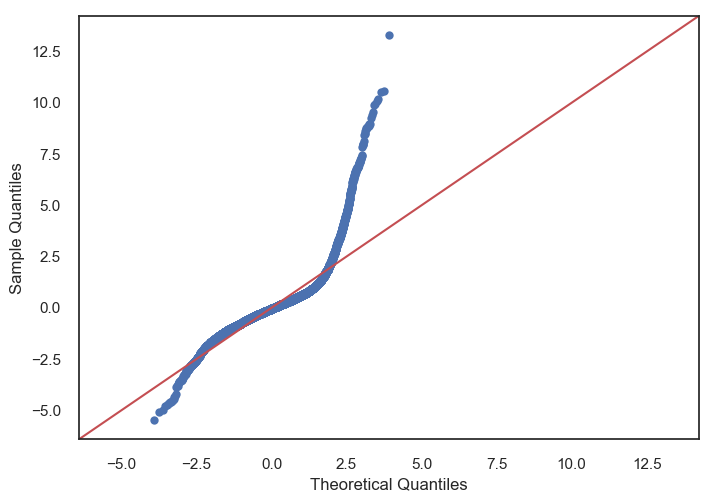

In [191]:
residuals = model2.resid
fig = sm.graphics.qqplot(residuals, dist=stats.norm, line='45', fit=True)
fig.show()

In [193]:
name = ['F statistic', 'p-value']
test = sms.het_goldfeldquandt(model2.resid, model2.model.exog)
list(zip(name, test))

[('F statistic', 1.0326296522010667), ('p-value', 0.04800900255316221)]

Since the null hypothesis for the GQ test is homoskedasticity, a larger F-stat would indicate more evidence against this, meaning we'd likely have heterskedasticity in our error terms.  Luckily, our F-stat is low and our p-value is just under the threshold, meaning that our residuals are likely homoskedastic.

## Conclusion

With our current model, we are able to predict housing prices with roughly 71% accuracy using the variables for sqft_living, grades, view, floors, and bedrooms.  Of our continuous variables, sqft_living had the biggest coefficient, showing a significant association with increased housing prices for every 1% increase in square footage.  Bedrooms and Floors both had negative coefficients, which at first thought seems counter-intuitive.  To this point, further exploration is needed to understand if the relationship between bedrooms and floors and prices is truly linear, if there are outliers that might be affecting the relationship, or if it's just the case that more bedrooms and more floors doesn't have to mean more money.  

While the interpretation of coefficients for categorical data is different, the categorical variables with the biggest positive impact on price are Grades 13 and 12, followed by View_4, Grade 11, and then Location_2.  Each of the view categories representing the number of times a house has been viewed (1-4) have positive coefficients, meaning they are associated with an increase in price.  Grades and location, however, have some positive coefficients while other dummies have negative coefficients, suggesting, for example with location, that where a house is located has implications for the housing value being higher or lower on average.  Again, some of the grades dummy variables do not have statistically significant coefficients, particularly the lower to medium grades (4-10). This would be one area to improve upon, for instance if binning the grades variable in a different way could provide for more statistical significance. 


Another issue to consider for future iterations are the residuals, which we showed above do not have a normal distribution.  Our OLS summary also showed a high level of skewness and kurtosis affecting our model.  These issues can likely be addressed through a deeper EDA phase, along with applying more advanced techniques for utilizing the year built and year renovated data, perhaps through different binning options and/or controlling for other external influencers (world events, financial crises, housing policy changes, etc.).